# Project 3 - Exploring Excellence: Top 1000 Global Universities
This dataset is related to the ranking of 1000 top universities in the world. It has fourteen columns and one thousand rows. The dataset is updated a year ago in Kaggle. It includes columns such as:
* World Rank: Ranking of the university globally.
* Institution: Name of the institution.
* Location: Country of the institution.
* National Rank: Ranking of the university nationally.
* Quality of Education, Alumni Employment, Quality of Faculty, etc.: Metrics contributing to the overall score.
* Score: Composite score for ranking.
* Latitude and Longitude: Geographical coordinates.
    Since education is a fundamental aspect of our lives, both students and parents are keen to discover which educational institutions are excelling and what options best suit their needs.

  The main goal of this analysis is to classify universities as either top universities (those ranked in the top 100 globally) or non-top universities based on their features. This classification is critical for identifying the characteristics that distinguish top-ranked universities and predicting the likelihood of a university being top-ranked.

**Questions of Interest**

- What factors are most strongly associated with a university’s ranking in the top 100 globally?
- Can we accurately predict whether a university belongs to the top 100 category using logistic regression?
- How do logistic regression and decision tree models compare in their predictive performance for this classification task?
- What insights can be drawn from the decision tree visualization regarding the key splits leading to classification decisions?
- What are the probabilities associated with individual predictions for the test dataset?


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

## Data Preparation and Wrangling

In [3]:
# Check current working directory
import os
print(os.getcwd())  

C:\Users\duche_tcvgk5r


In [15]:
import pandas as pd

# Load the data and give an introduction
file_path = r"C:/Users/duche_tcvgk5r/Downloads/DATA201/Worlds Top 1000 Universities.csv"
data = pd.read_csv(file_path)

# Display dataset details
print("Dataset Overview:")
print(data.info())
print("\nSample Data:")
print(data.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   World Rank            1000 non-null   int64  
 1   Institution           1000 non-null   object 
 2   Location              1000 non-null   object 
 3   National Rank         1000 non-null   int64  
 4   Quality of Education  1000 non-null   float64
 5   Alumni Employment     1000 non-null   int64  
 6   Quality of Faculty    1000 non-null   float64
 7   Research Output       1000 non-null   int64  
 8   Quality Publications  1000 non-null   int64  
 9   Influence             1000 non-null   int64  
 10  Citations             1000 non-null   int64  
 11  Score                 1000 non-null   float64
 12  Latitude              1000 non-null   float64
 13  Longitude             1000 non-null   float64
dtypes: float64(5), int64(7), object(2)
memory usage: 109.5+

In [21]:
# Drop columns that may not be useful for modeling and rename for simplicity
data_cleaned = data.rename(columns=lambda x: x.strip().replace(' ', '_'))
data_cleaned.head()

,World_Rank,Institution,Location,National_Rank,Quality_of_Education,Alumni_Employment,Quality_of_Faculty,Research_Output,Quality_Publications,Influence,Citations,Score,Latitude,Longitude
0,1,Harvard University,USA,1,2.0,1,1.0,1,1,1,1,100.0,39.783730,-100.445882
1,2,Stanford University,USA,2,10.0,3,2.0,10,4,3,2,96.7,39.783730,-100.445882
2,3,Massachusetts Institute of Technology,USA,3,3.0,11,3.0,30,15,2,6,95.1,39.783730,-100.445882
3,4,University of Cambridge,United Kingdom,1,5.0,19,6.0,12,8,6,19,94.0,54.702354,-3.276575
4,5,University of Oxford,United Kingdom,2,9.0,25,10.0,9,5,7,4,93.2,54.702354,-3.276575


In [23]:
# Check for missing values
missing_values = data_cleaned.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
World_Rank              0
Institution             0
Location                0
National_Rank           0
Quality_of_Education    0
Alumni_Employment       0
Quality_of_Faculty      0
Research_Output         0
Quality_Publications    0
Influence               0
Citations               0
Score                   0
Latitude                0
Longitude               0
dtype: int64


There is no missing values in the dataset.

In [27]:
# Identify the target variable and feature columns
# For simplicity, we classify universities as 'top' or 'not' based on their World Rank
threshold = 100
data_cleaned['Top_University'] = np.where(data_cleaned['World_Rank'] <= threshold, 1, 0)
print(data_cleaned)

     World_Rank                            Institution        Location  \
0             1                     Harvard University             USA   
1             2                    Stanford University             USA   
2             3  Massachusetts Institute of Technology             USA   
3             4                University of Cambridge  United Kingdom   
4             5                   University of Oxford  United Kingdom   
..          ...                                    ...             ...   
995         996                    Aga Khan University        Pakistan   
996         997                 University of Calcutta           India   
997         998                       K?chi University           Japan   
998         999               Soonchunhyang University     South Korea   
999        1000              Capital Normal University           China   

     National_Rank  Quality_of_Education  Alumni_Employment  \
0                1                   2.0        

Under the Top_University column, 1 means that it is a top university and 0 means it is not, based on our 100 treshold.

In [29]:
# Features (excluding target and identifiers)
features = ['Quality_of_Education', 'Alumni_Employment', 'Quality_of_Faculty',
            'Research_Output', 'Quality_Publications', 'Influence', 'Citations', 'Score']
X = data_cleaned[features]
y = data_cleaned['Top_University']

**Explanation**

The Feature Selection (features) list identifies which columns from the data_cleaned dataframe will be used as predictors in the model. These columns include metrics such as Quality_of_Education, Alumni_Employment, Research_Output, and others that describe various attributes of universities. These selected features are the independent variables (X) used to train the model. This dataframe serves as the input data for the model, capturing the predictors.

The Dependent Variable (y) is set up to provide the target variable for classification. The Top_University column is a binary classification label (1 for top universities, 0 for non-top universities) created earlier based on whether a university’s world rank is within the top 100.
The purpose is to prepare the dataset for modeling since it is essential for training machine learning models like logistic regression or decision trees.

In [31]:
# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

The code above uses the train_test_split function to divide the dataset into training and testing sets, a crucial step in machine learning workflows. The feature matrix X contains the predictor variables, while y represents the target variable (Top_University). The split assigns 70% of the data to the training set and 30% to the testing set, controlled by test_size=0.3. To ensure reproducibility, a fixed random_state=42 is used, allowing the same split to be reproduced in future runs. This approach helps prevent overfitting by training the model on one subset of the data and evaluating its performance on unseen data, ensuring that the model generalizes well to new data.

## Exploratory Data Analysis (EDA)

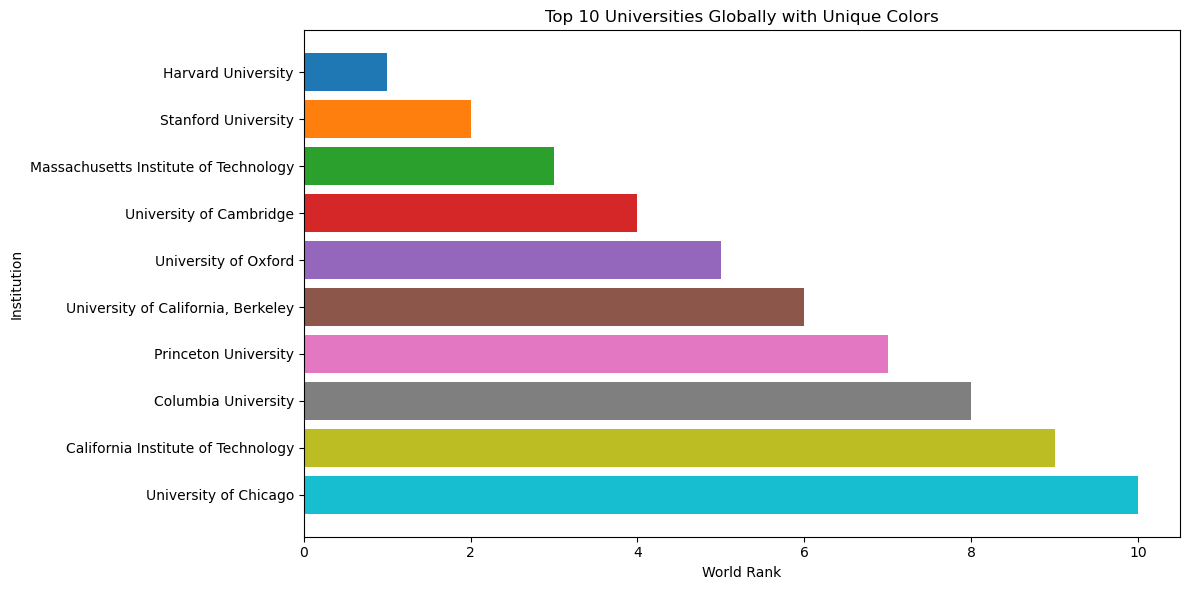

In [114]:
# Generate unique colors for each bar
import matplotlib.colors as mcolors

# Extract unique colors for top 10 universities globally and nationally
colors_global = list(mcolors.TABLEAU_COLORS.values())[:10]
colors_national = list(mcolors.CSS4_COLORS.values())[10:20]

# Extract the top 10 universities globally and nationally
top_10_global = data_cleaned.nsmallest(10, "World_Rank")
top_10_national = data_cleaned.nsmallest(10, "National_Rank")

# Plot the top 10 global universities with unique colors
plt.figure(figsize=(12, 6))
plt.barh(top_10_global["Institution"], top_10_global["World_Rank"], color=colors_global)
plt.gca().invert_yaxis()  # Invert the y-axis for ranking order
plt.title("Top 10 Universities Globally with Unique Colors")
plt.xlabel("World Rank")
plt.ylabel("Institution")
plt.tight_layout()
plt.show()

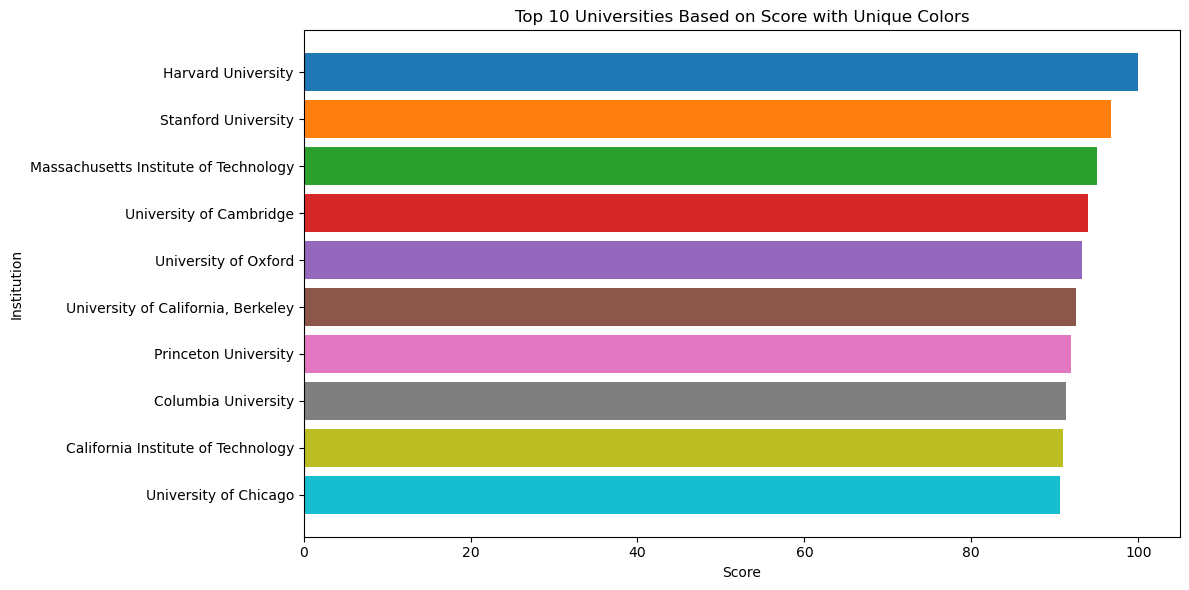

In [118]:
# Choosing another metric "Score", to display top universities
top_10_score = data_cleaned.nlargest(10, "Score")

# Plot the top 10 universities based on score
colors_score = list(mcolors.TABLEAU_COLORS.values())[:10]

plt.figure(figsize=(12, 6))
plt.barh(top_10_score["Institution"], top_10_score["Score"], color=colors_score)
plt.gca().invert_yaxis()  # Invert the y-axis for ranking order
plt.title("Top 10 Universities Based on Score with Unique Colors")
plt.xlabel("Score")
plt.ylabel("Institution")
plt.tight_layout()
plt.show()


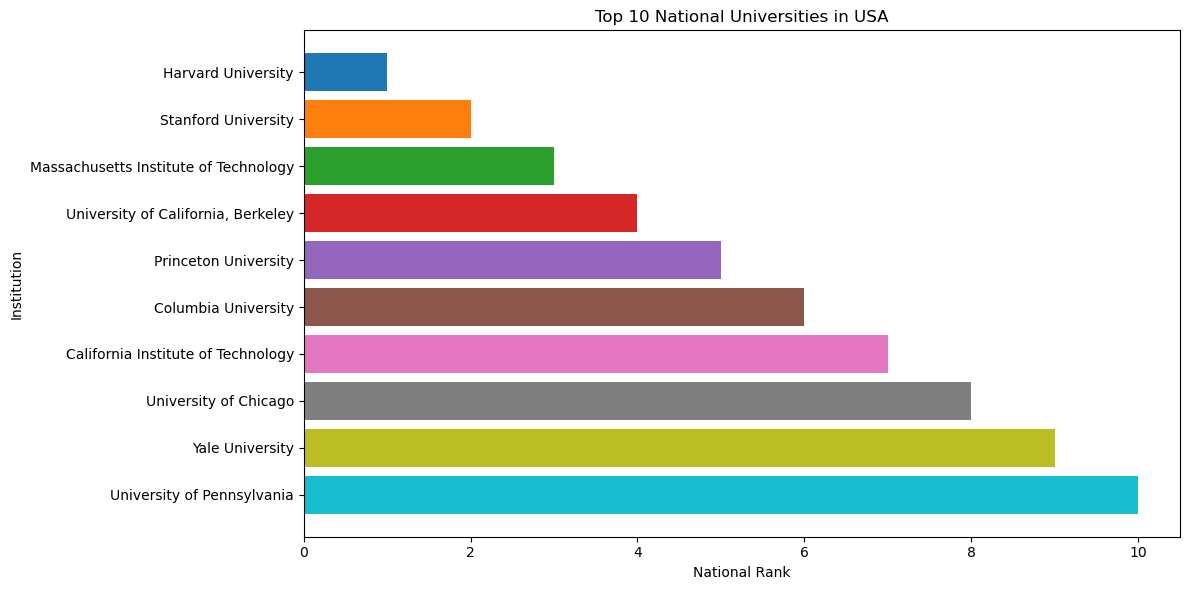

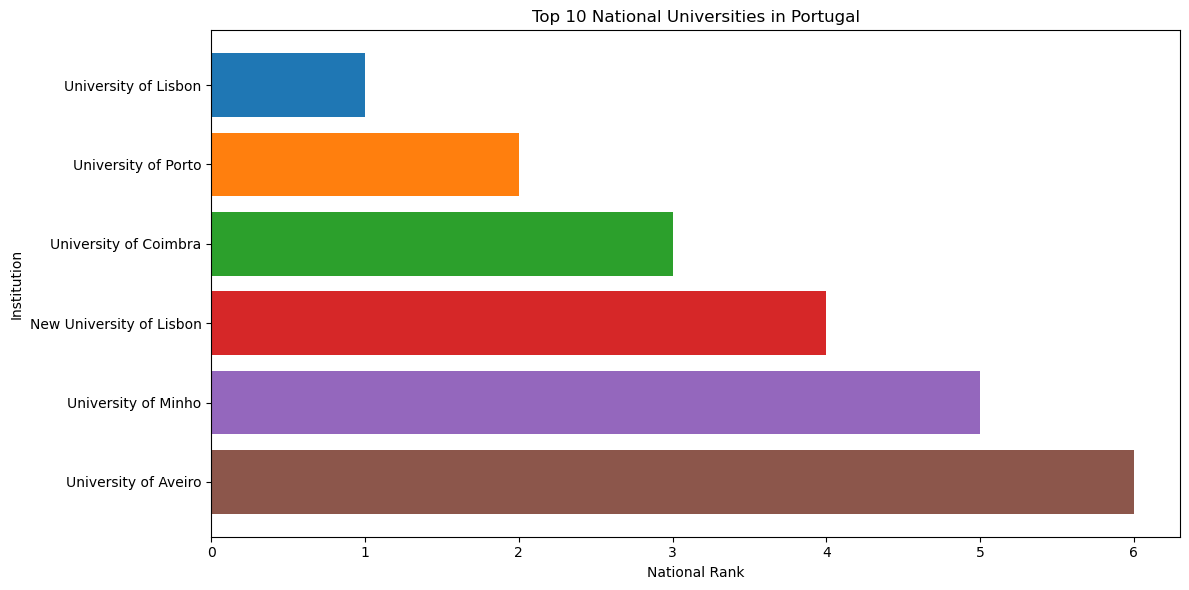

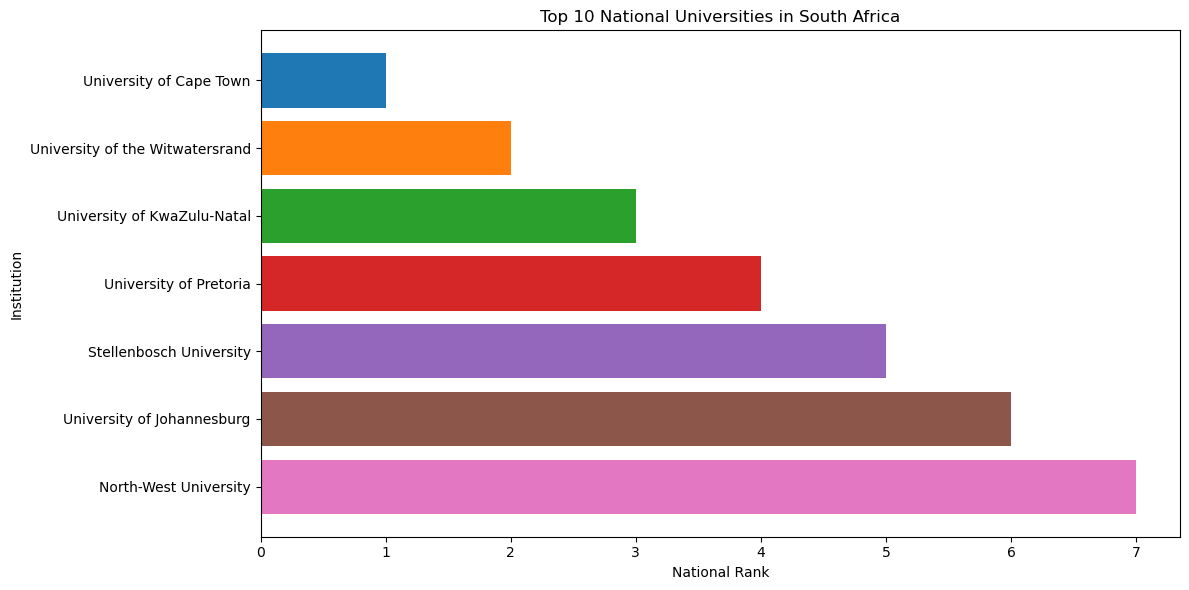

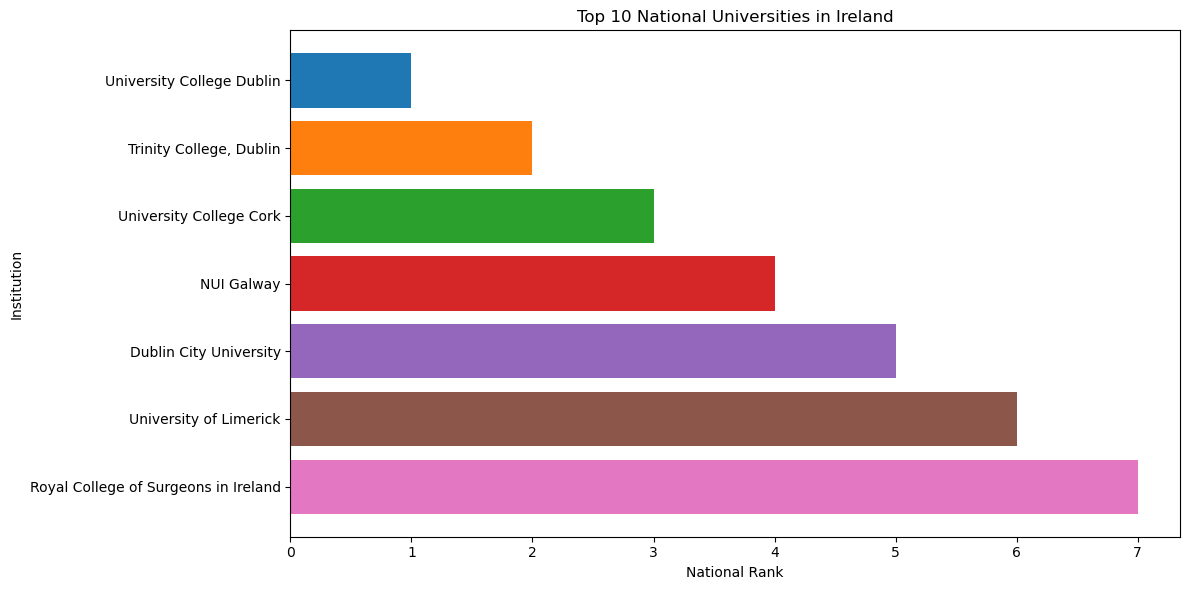

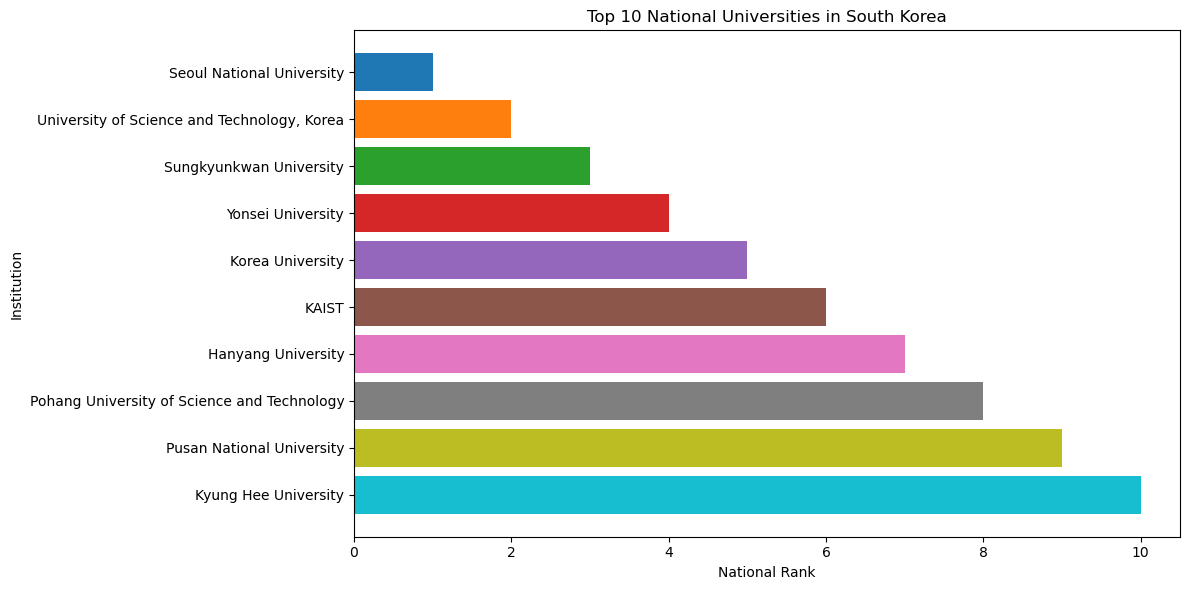

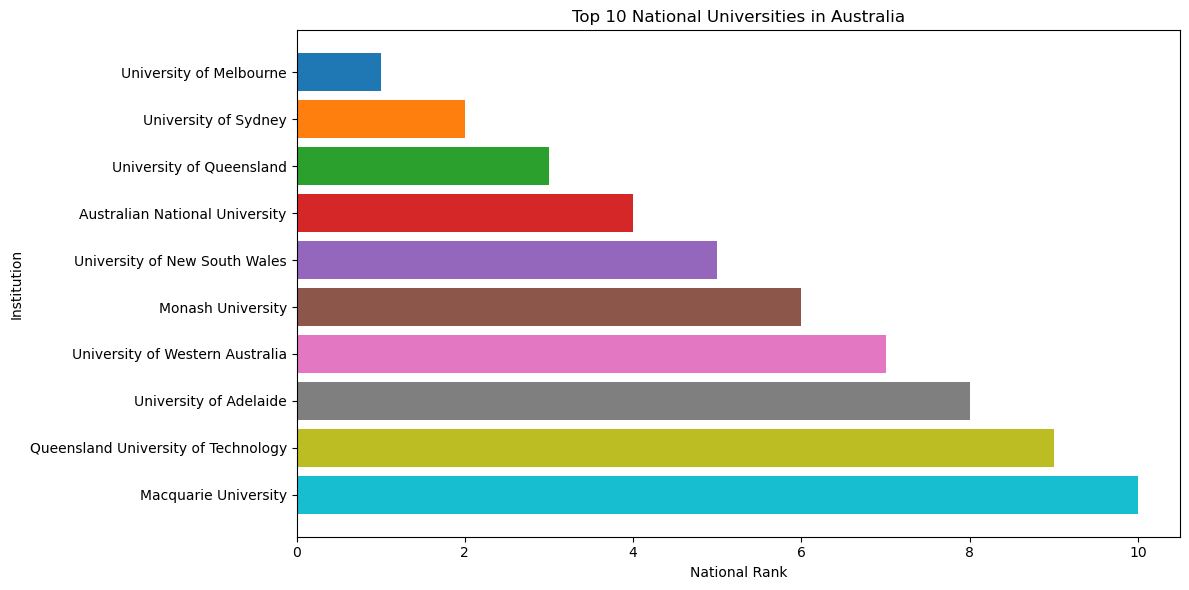

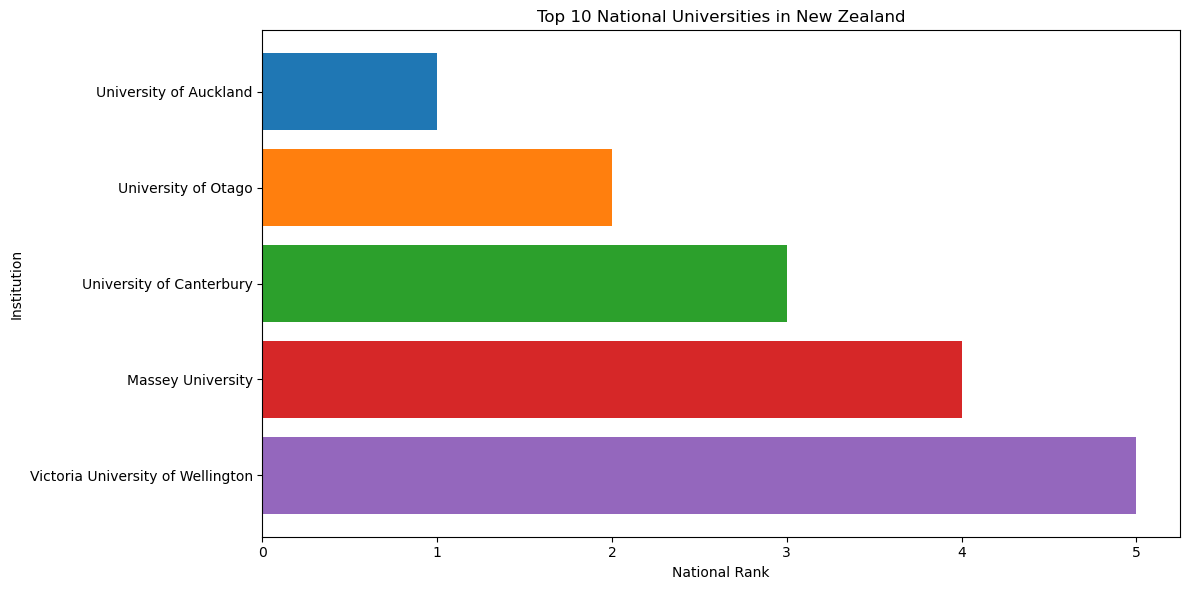

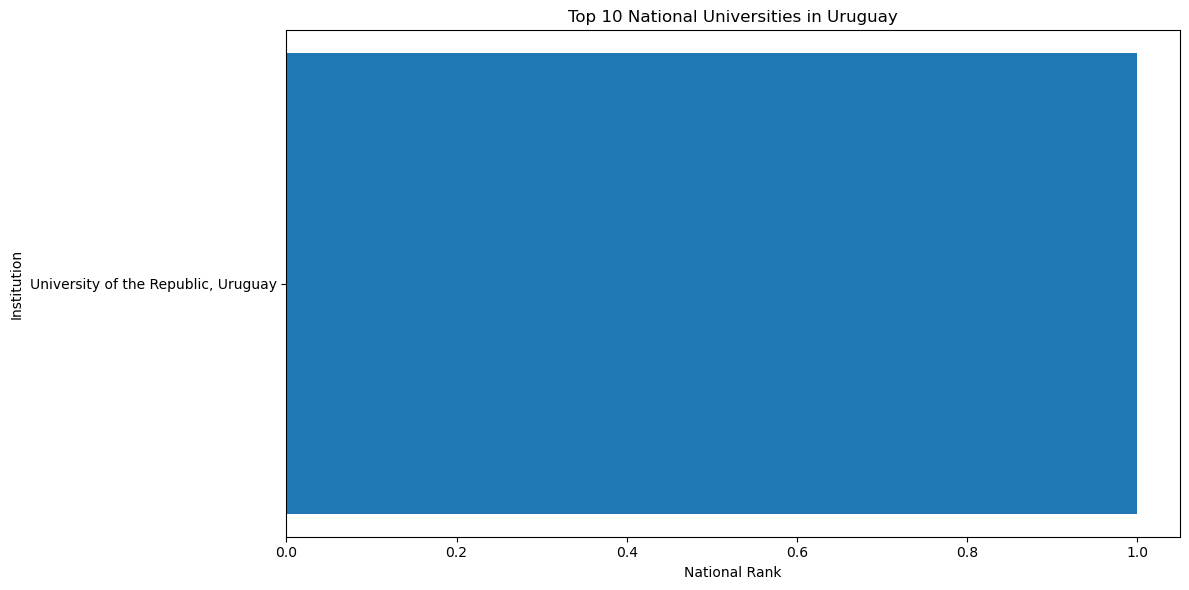

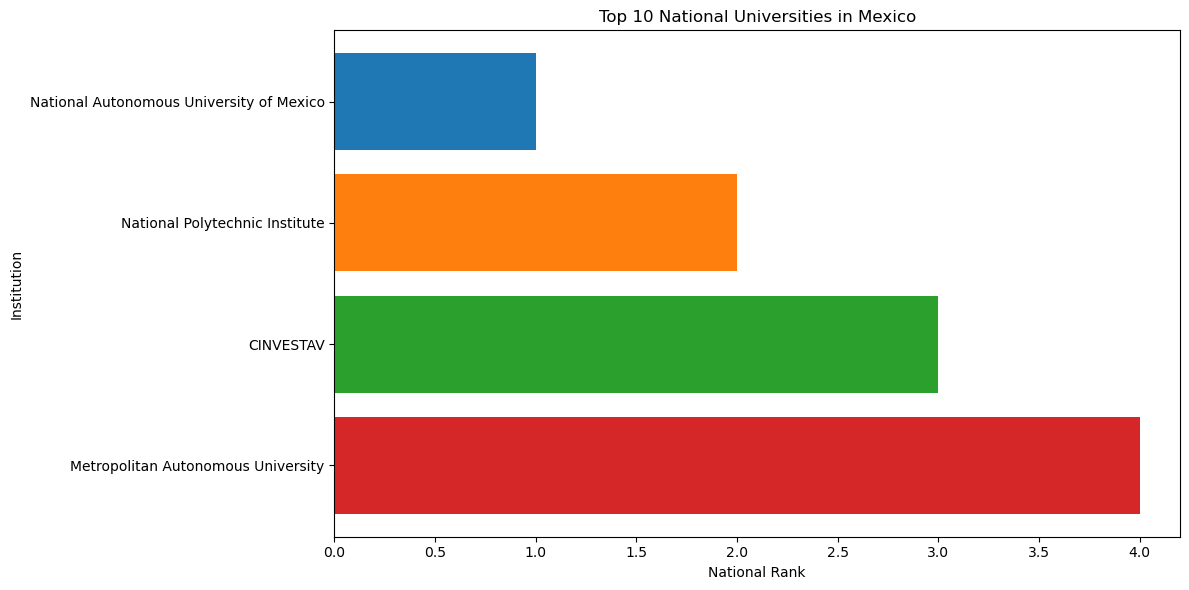

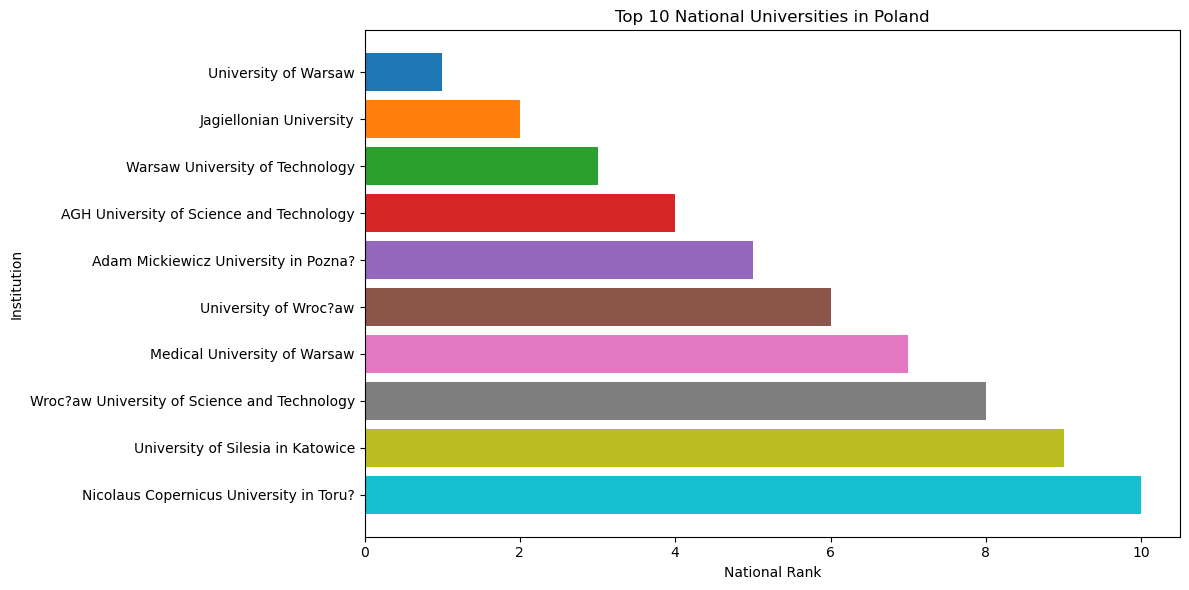

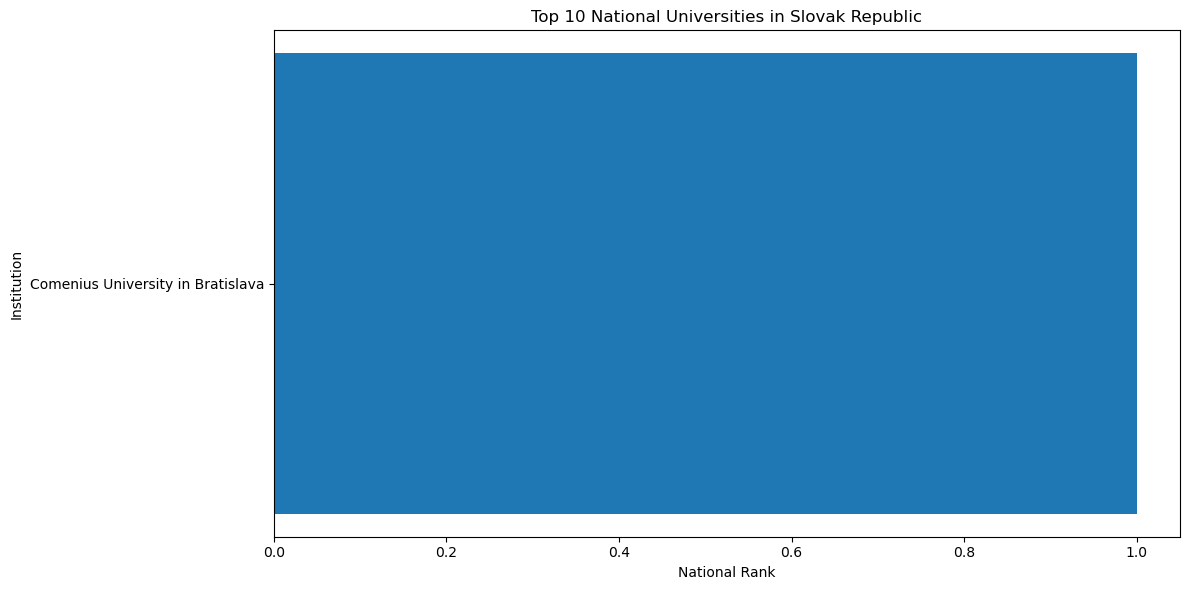

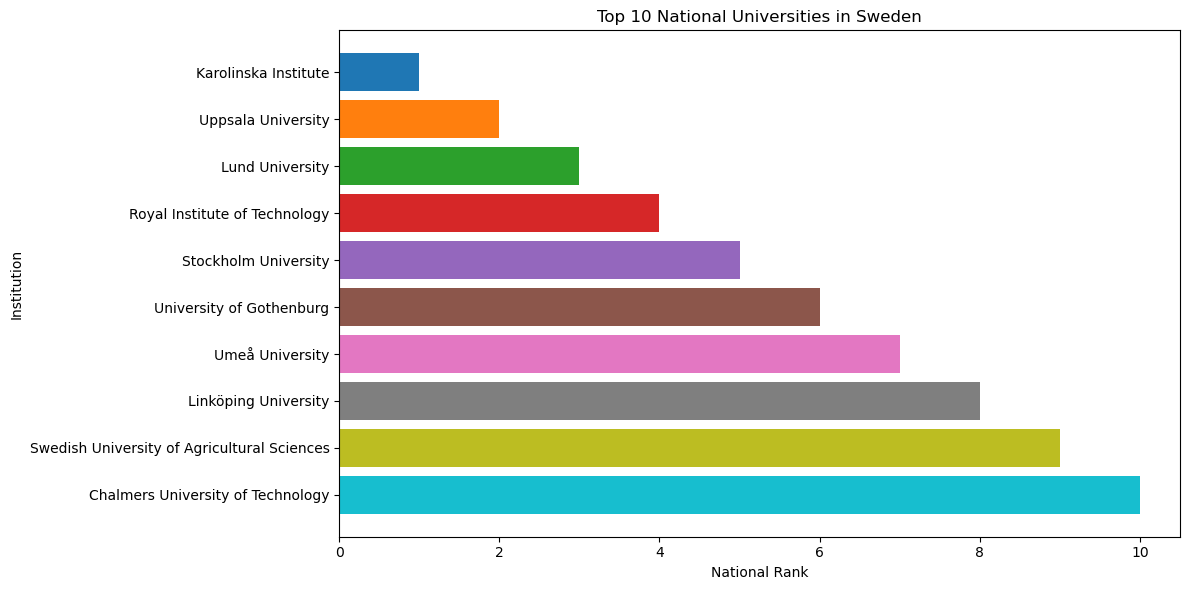

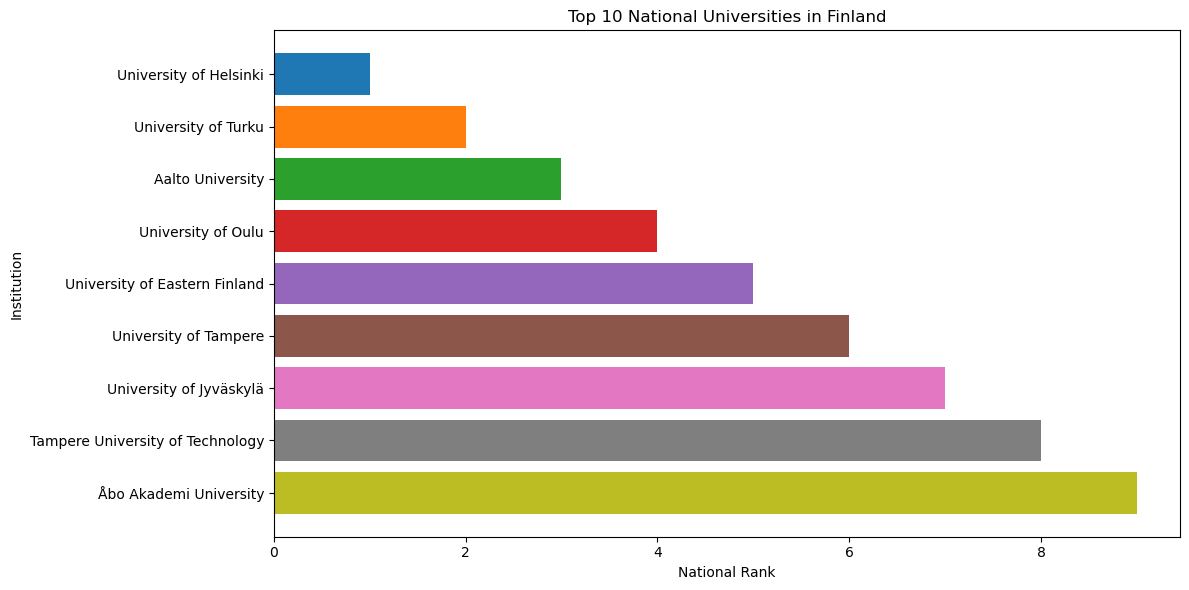

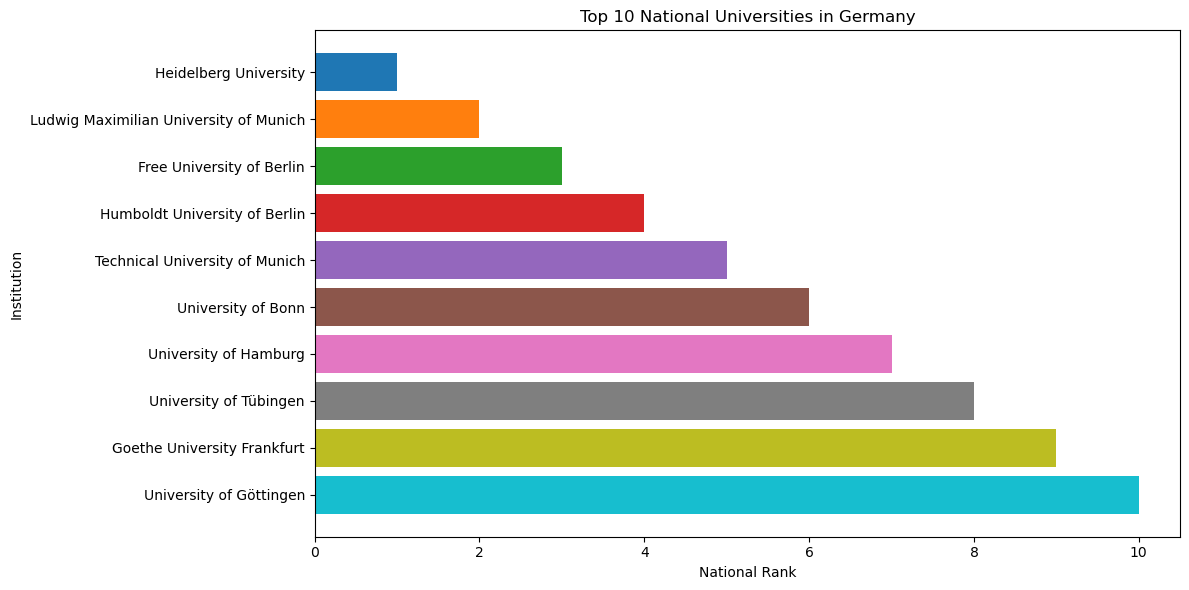

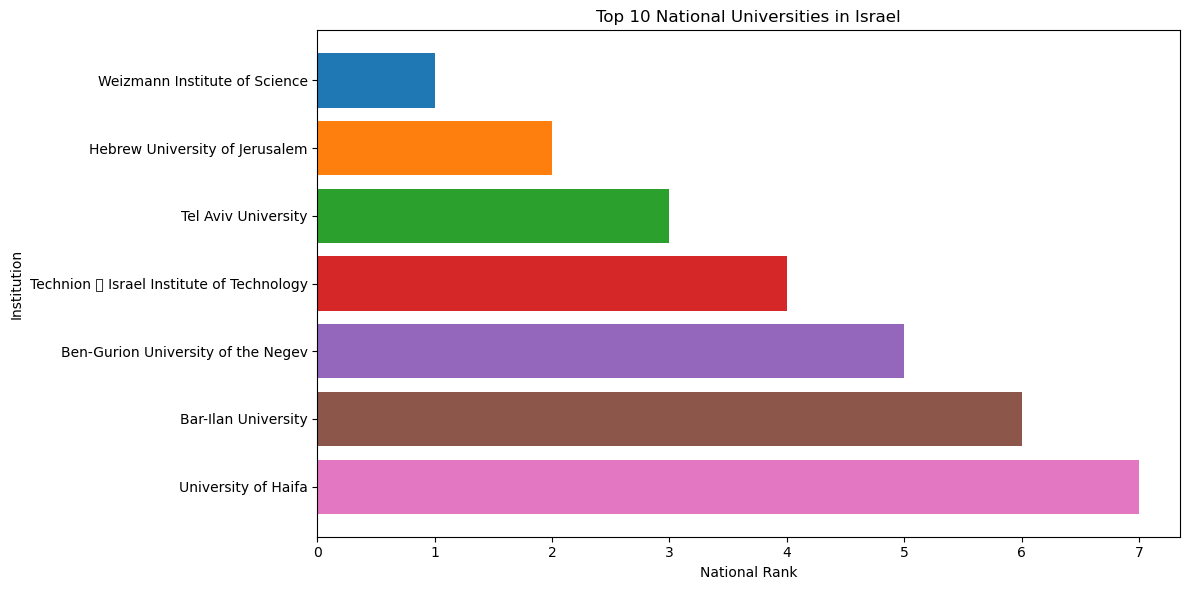

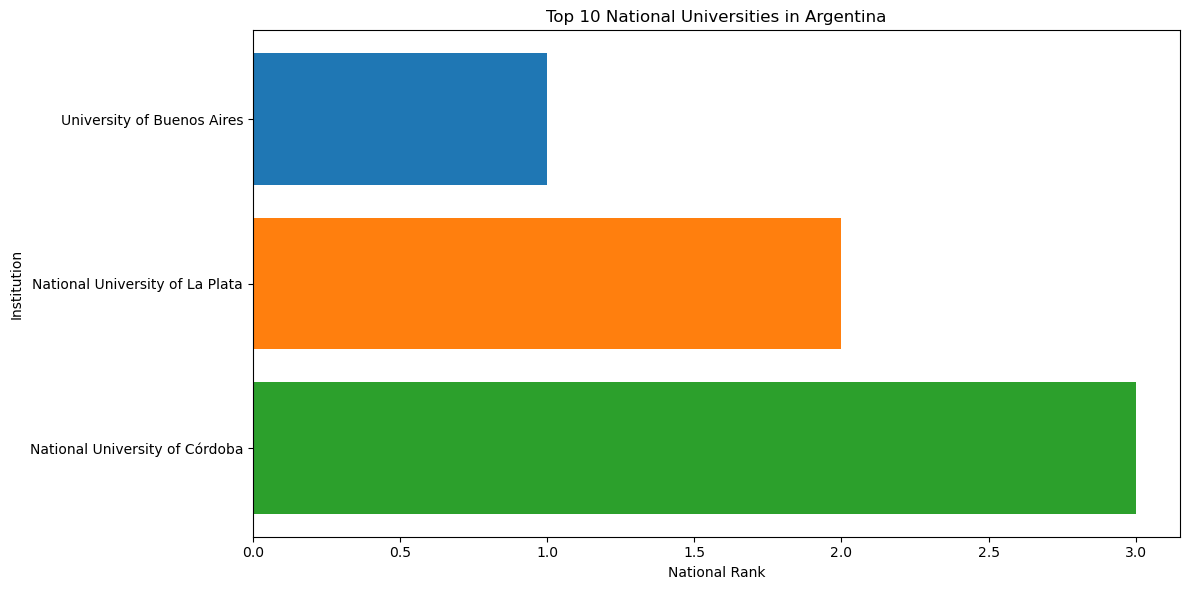

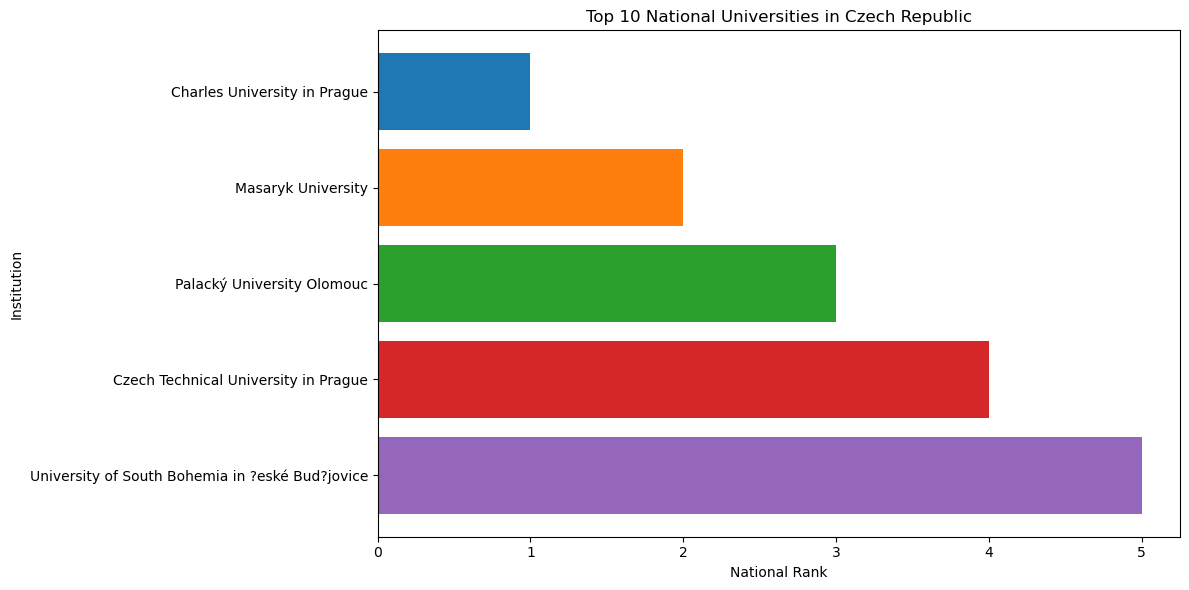

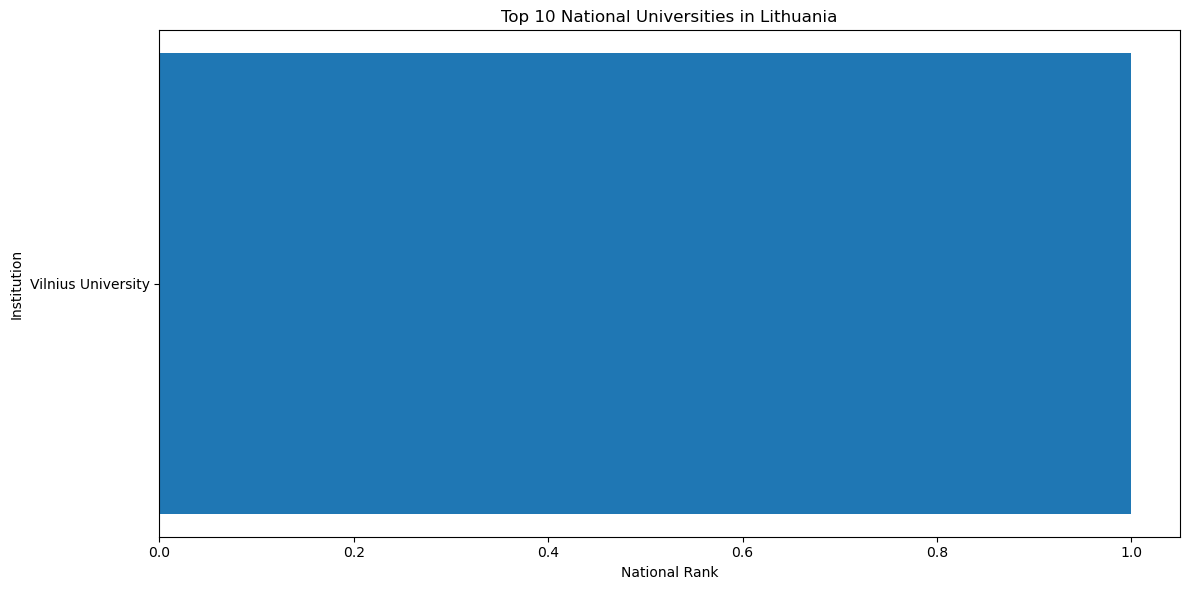

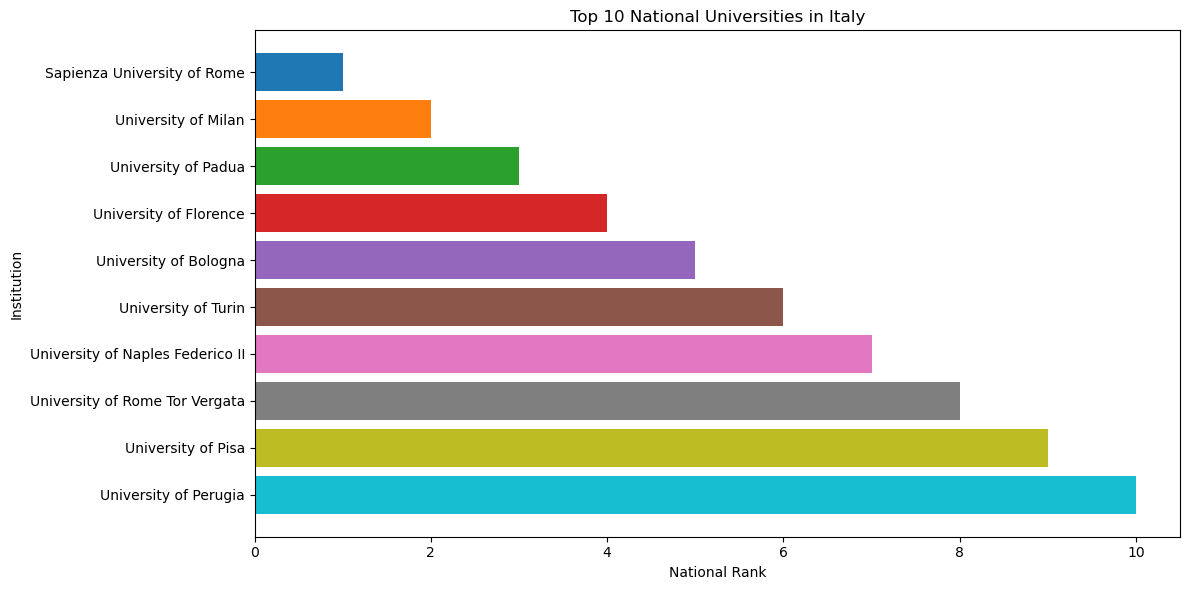

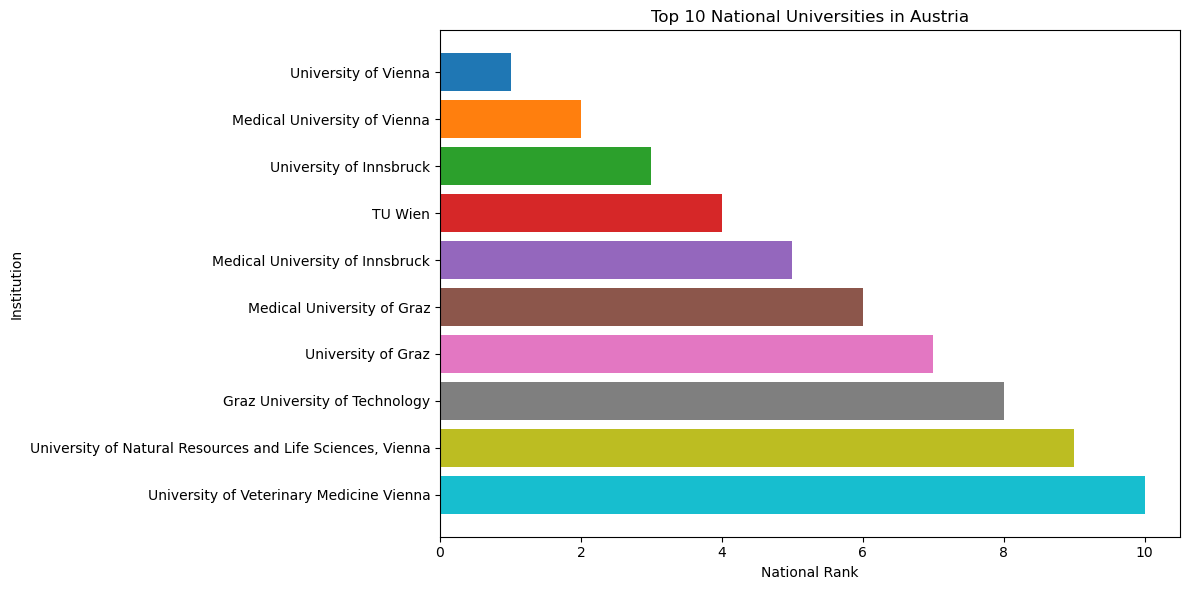

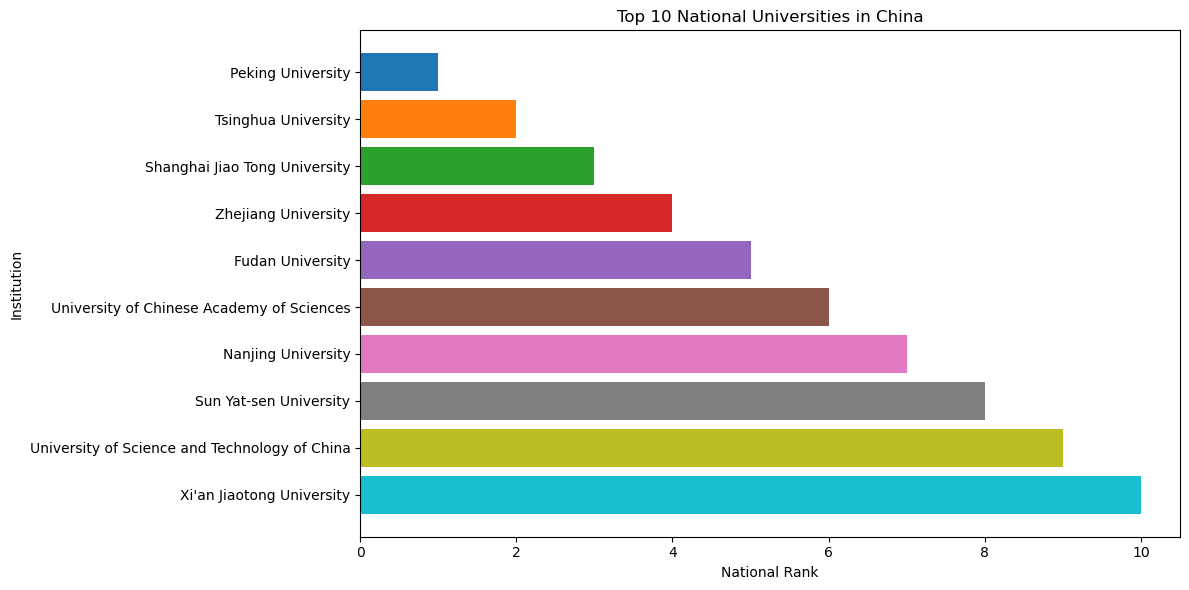

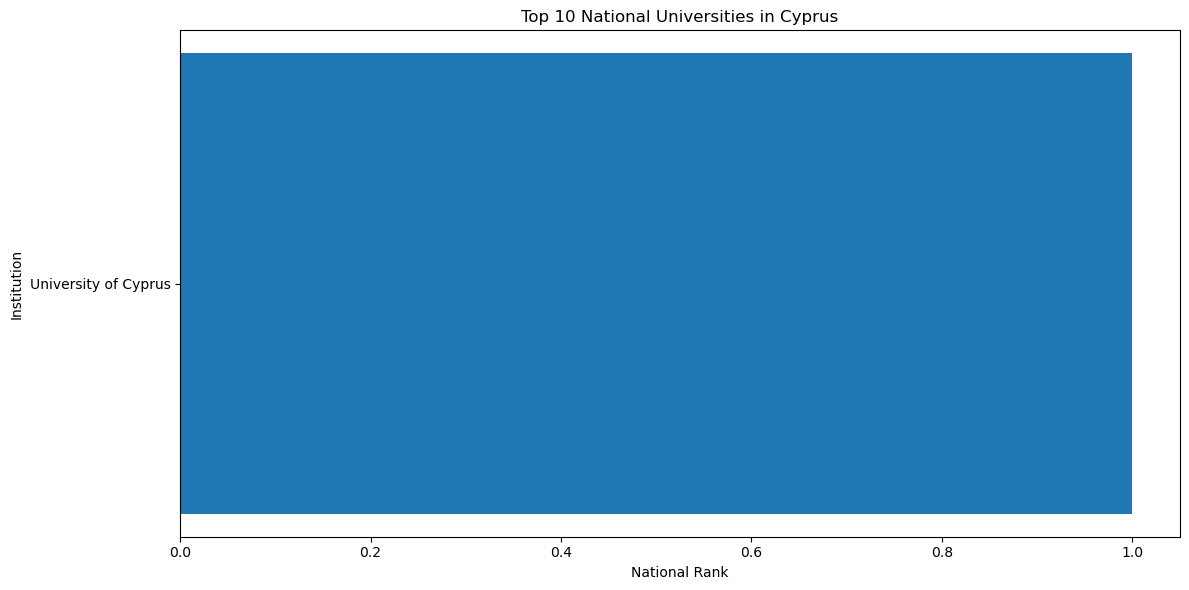

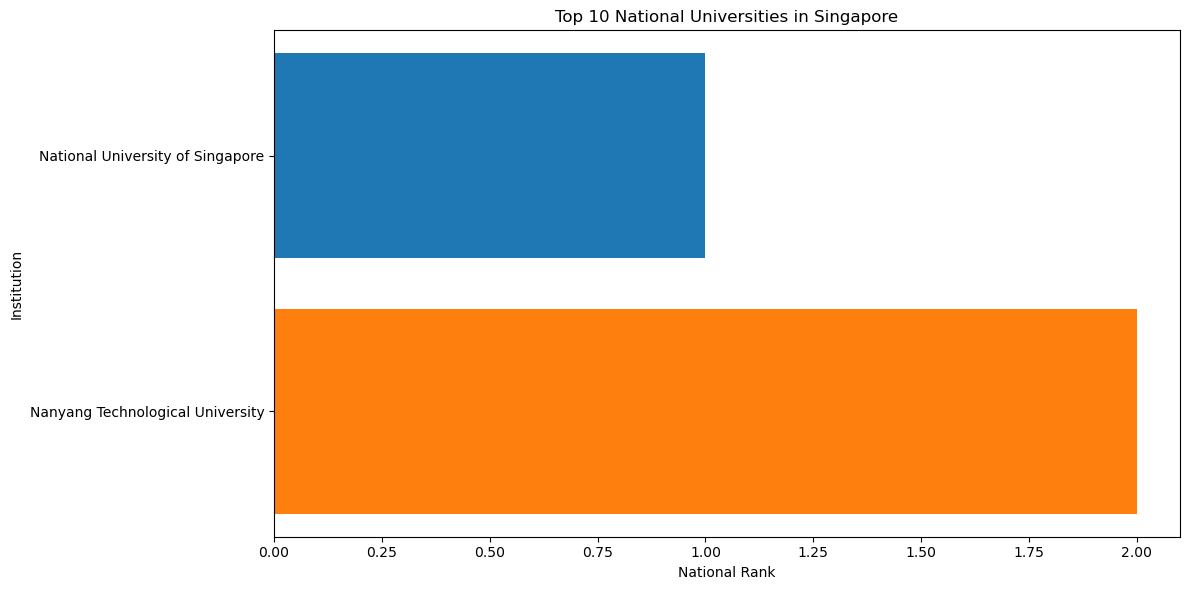

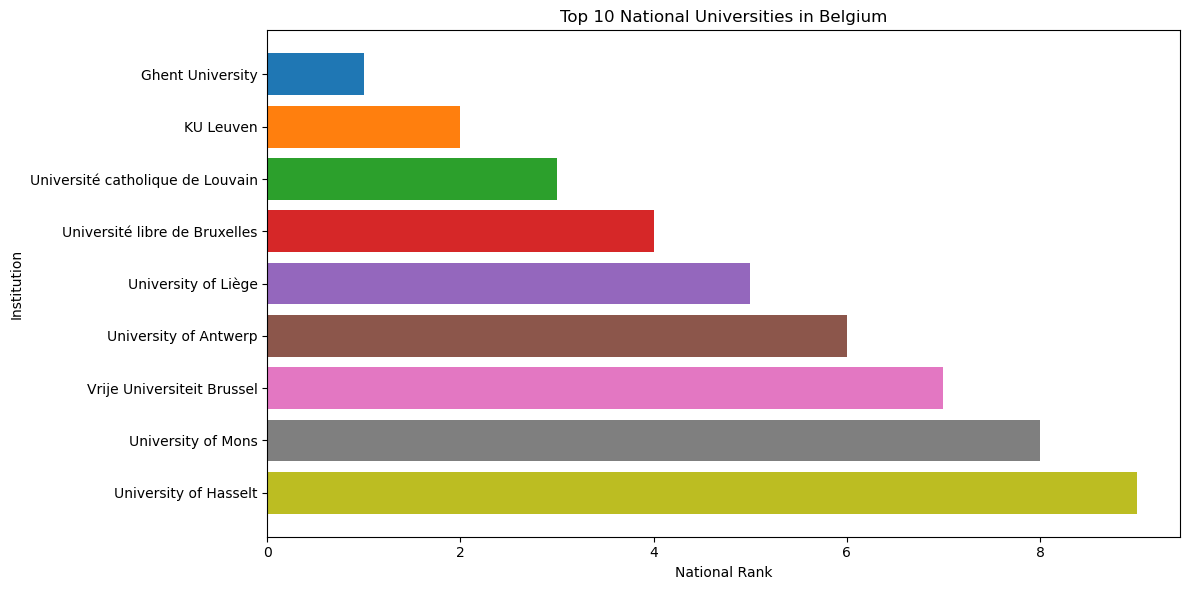

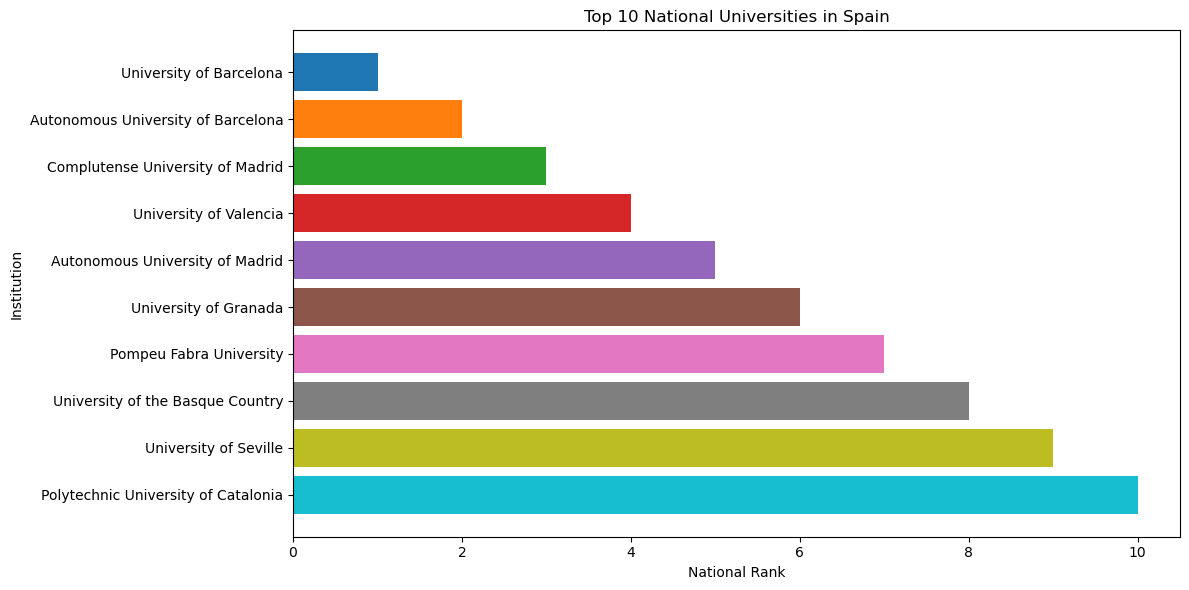

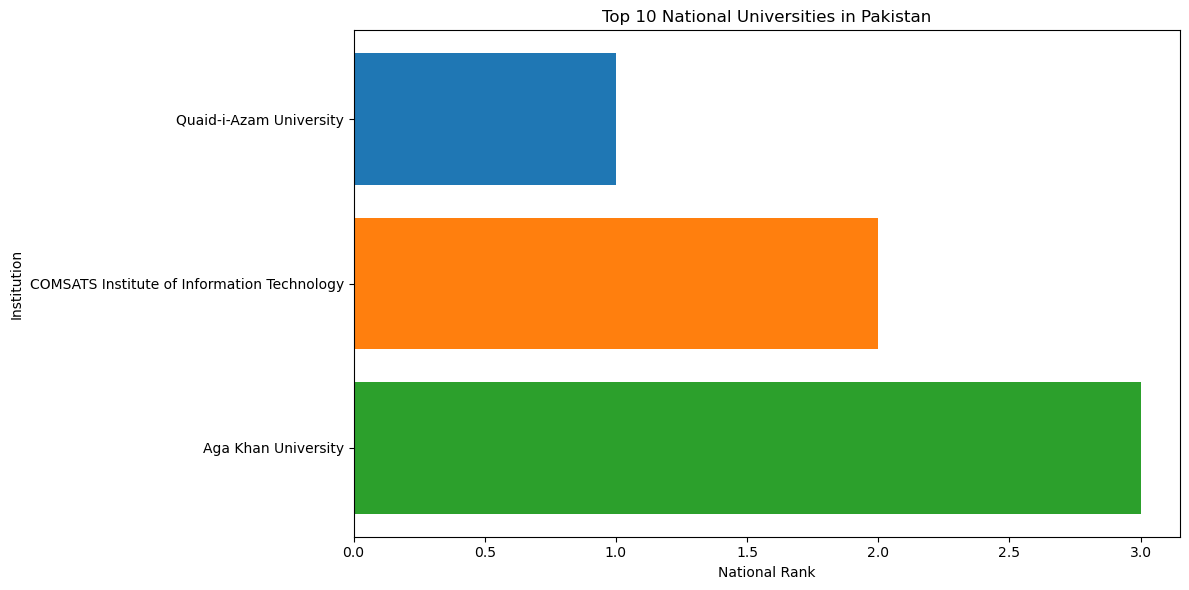

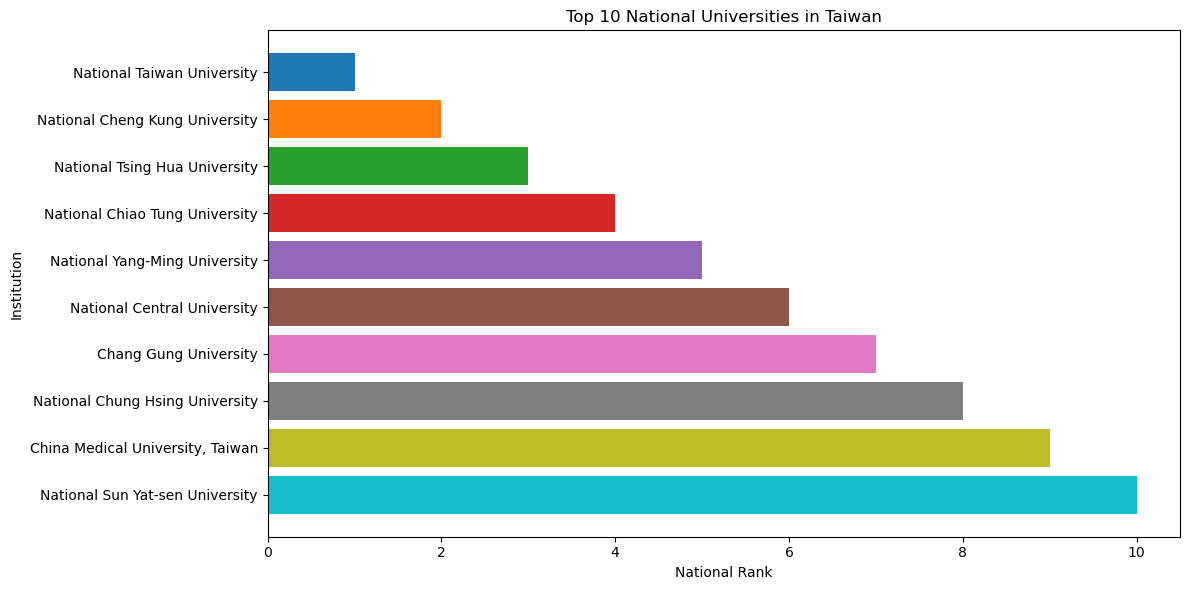

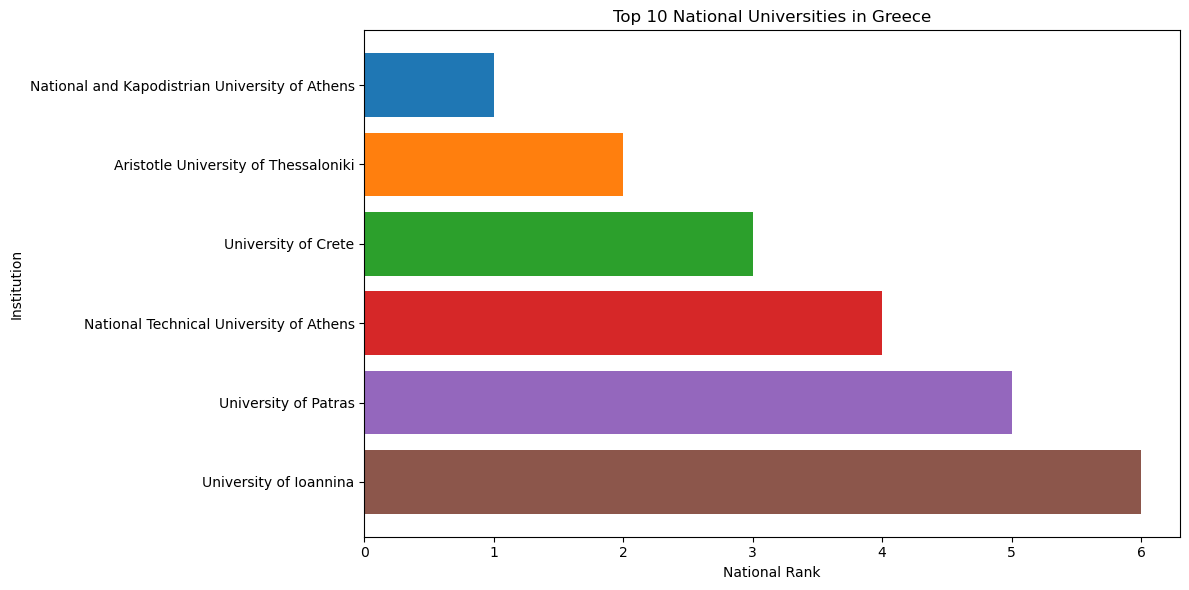

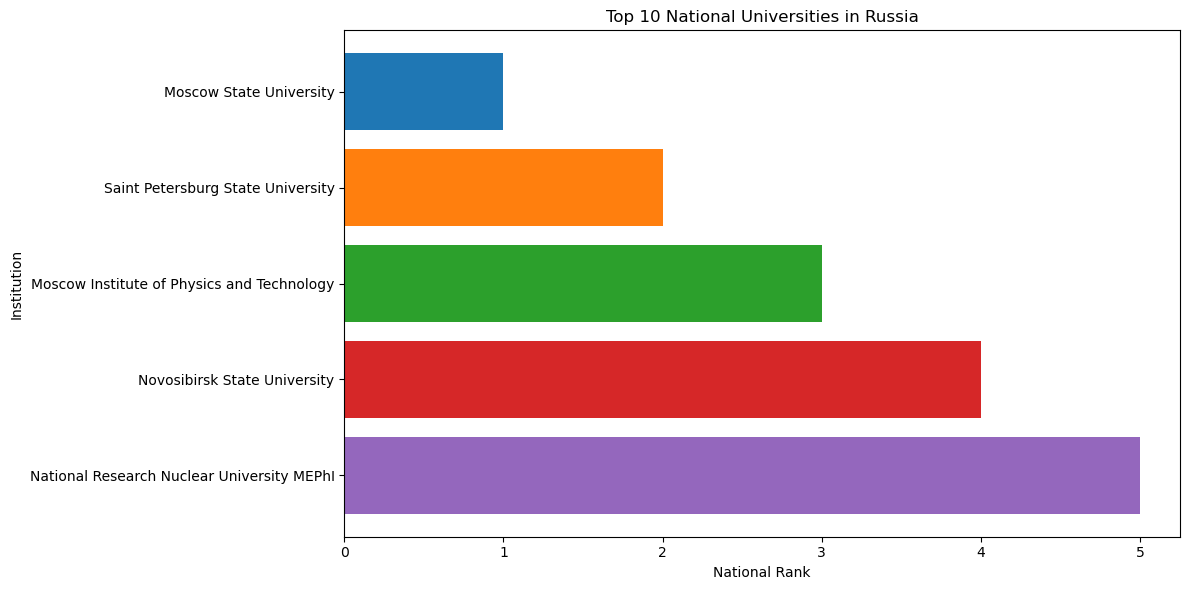

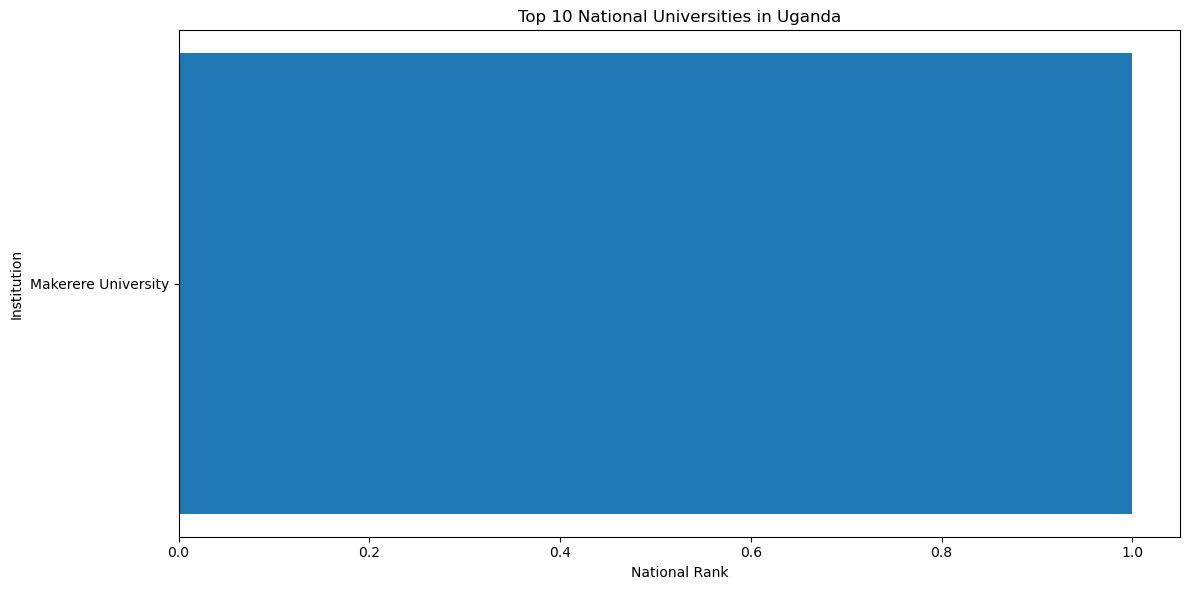

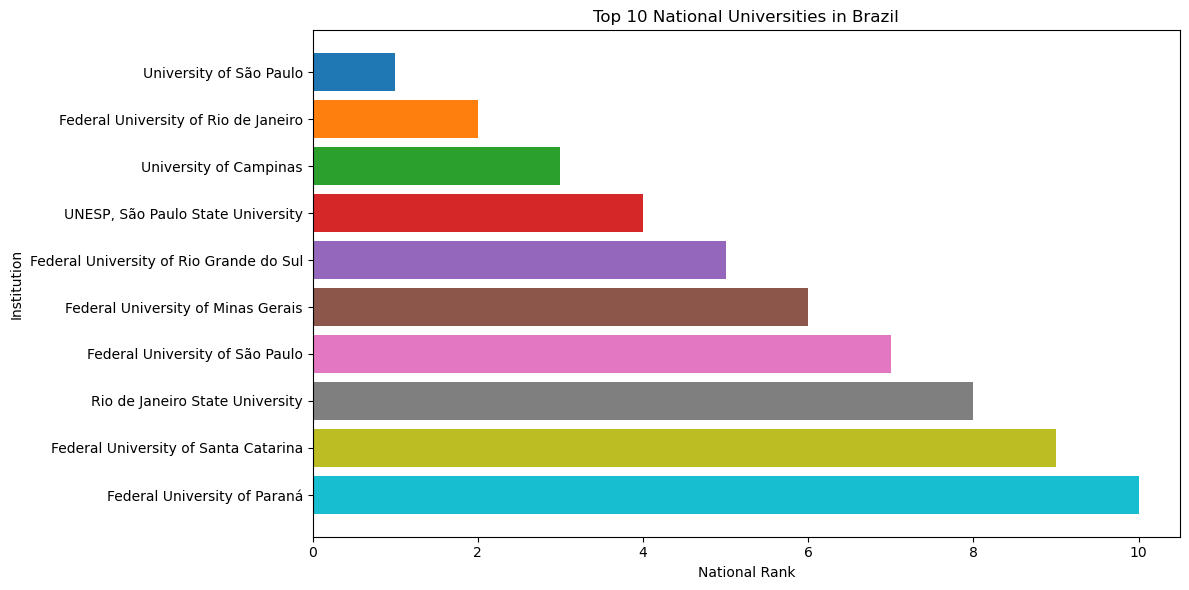

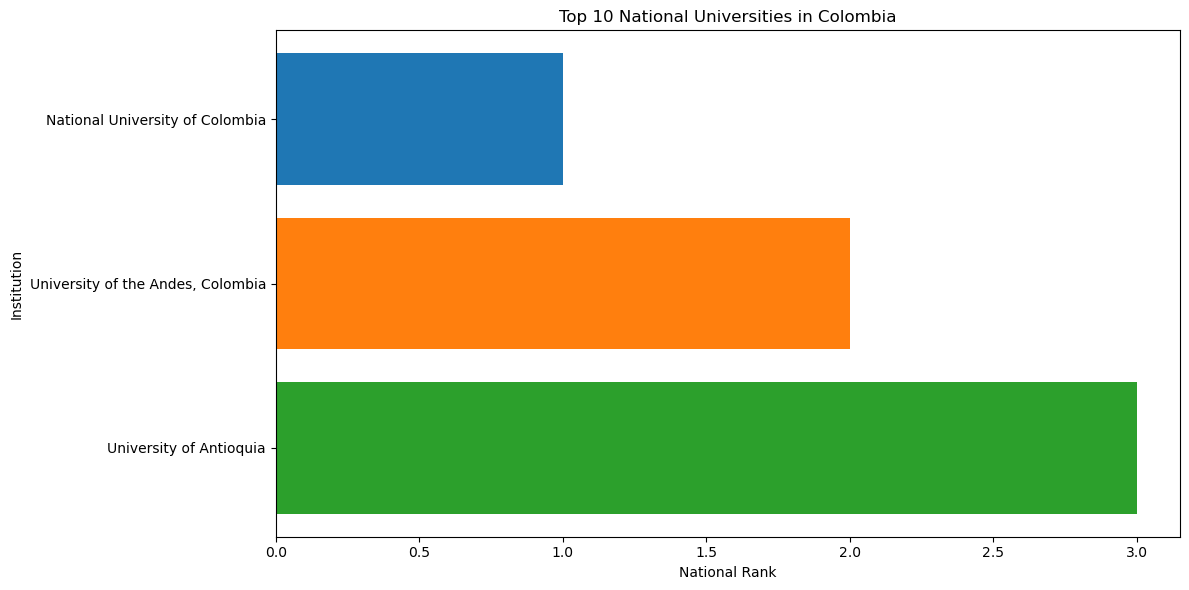

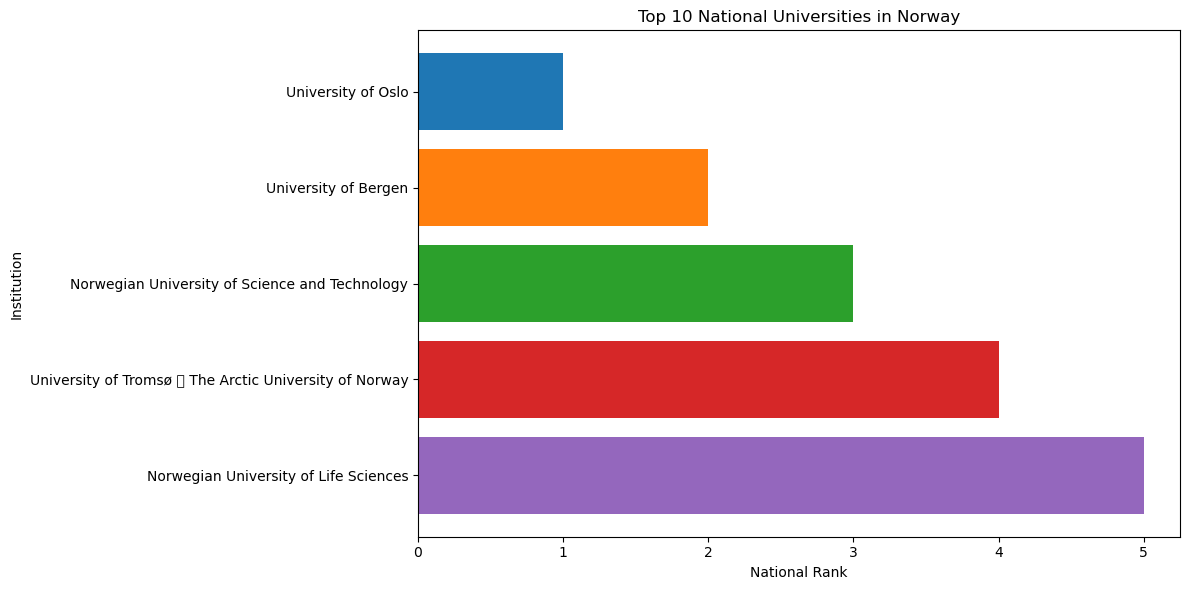

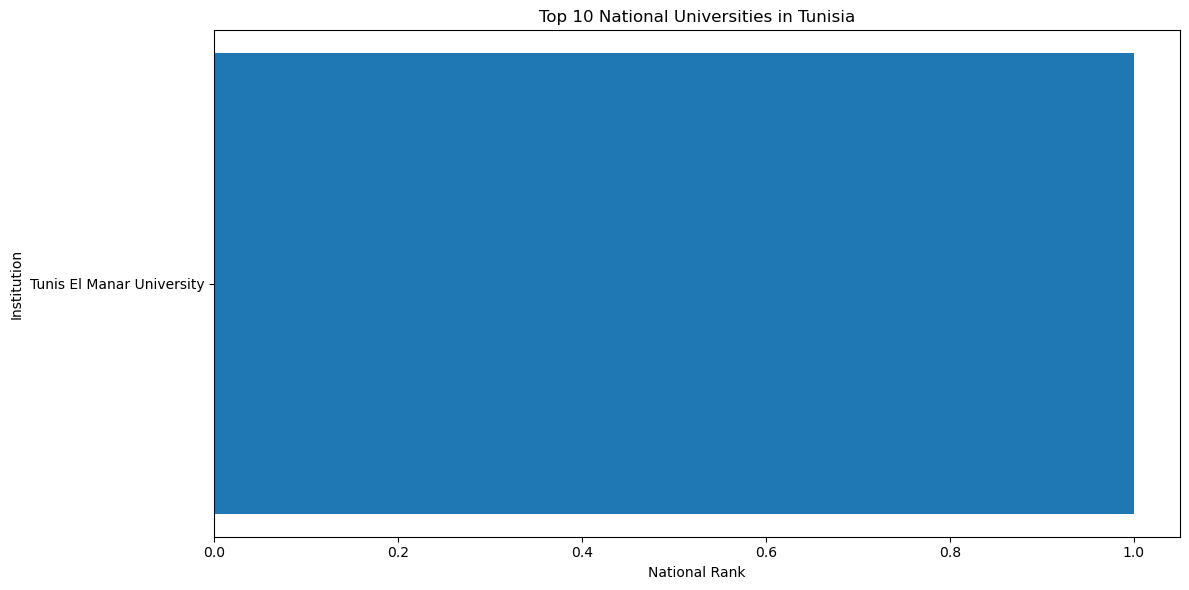

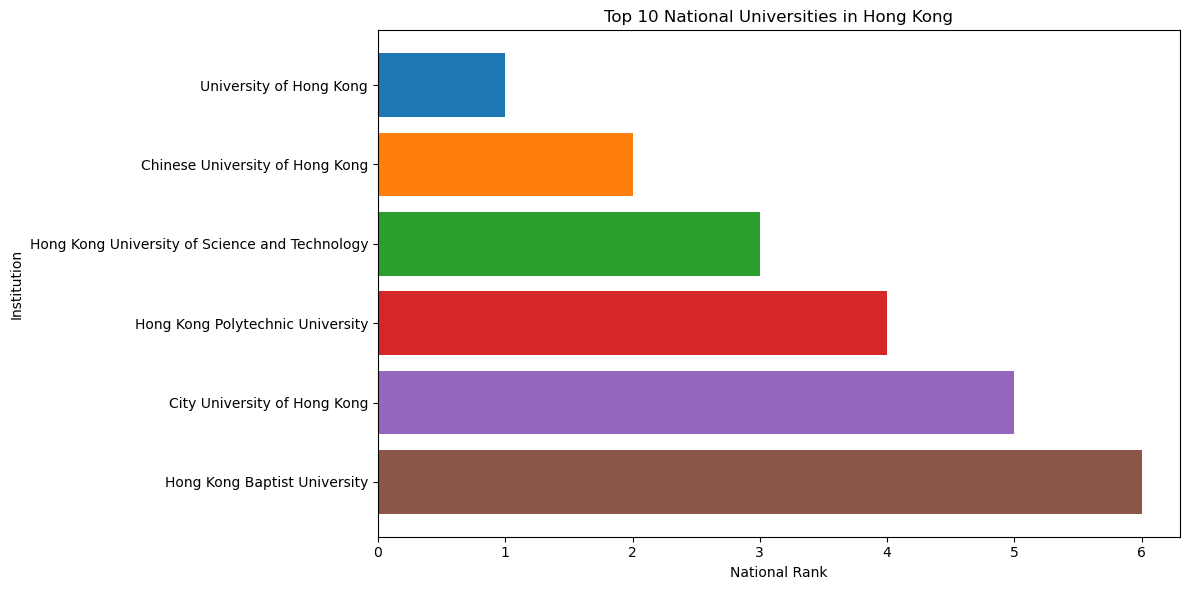

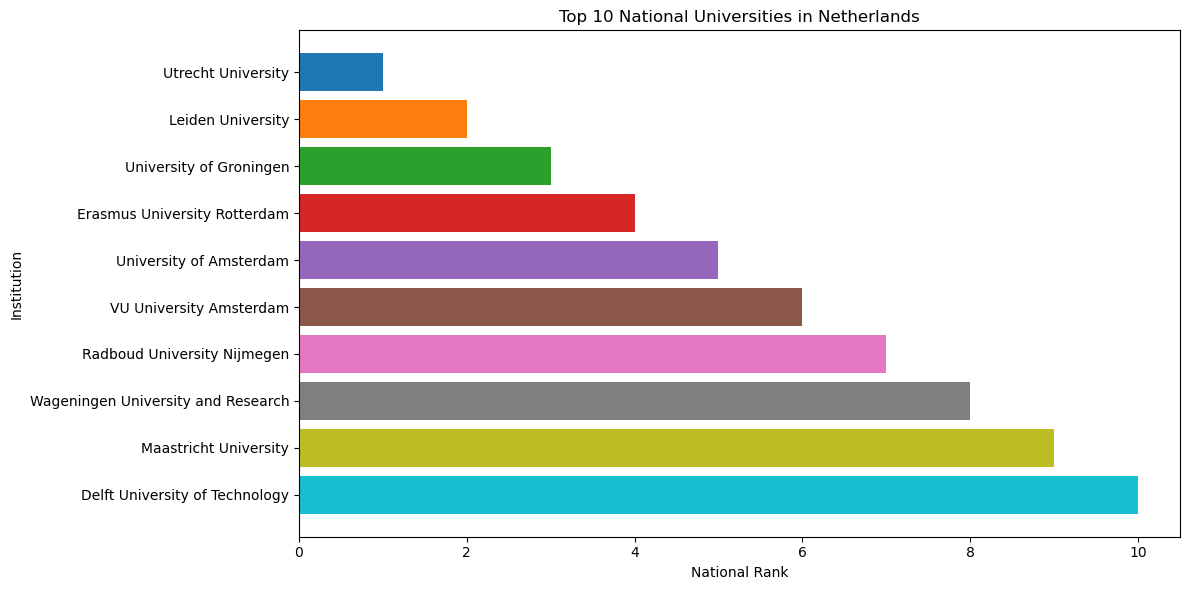

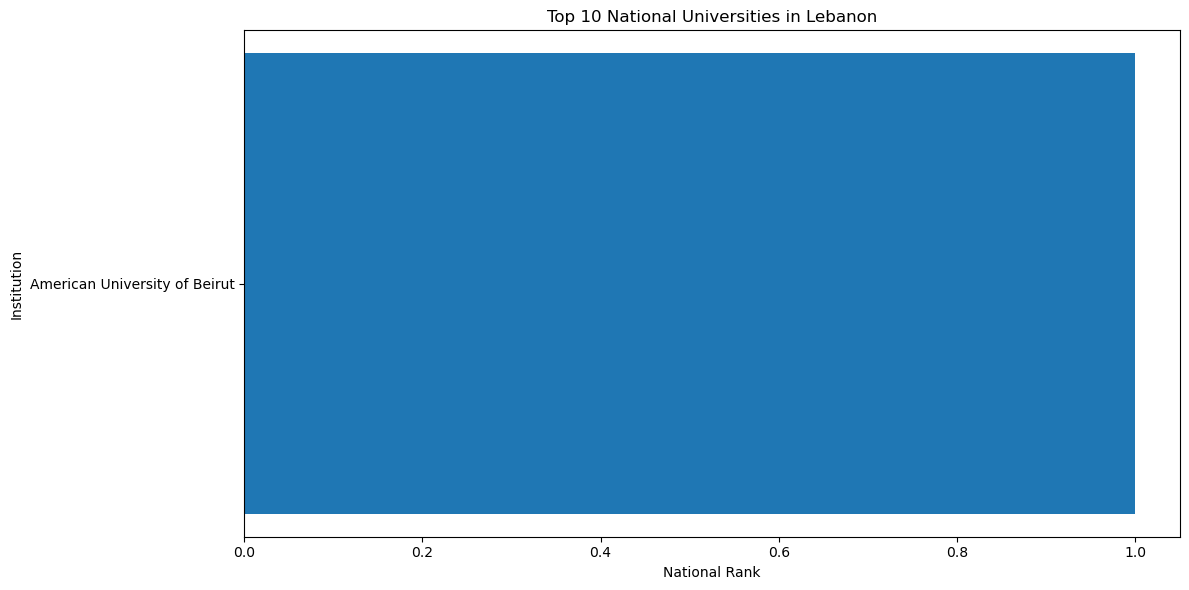

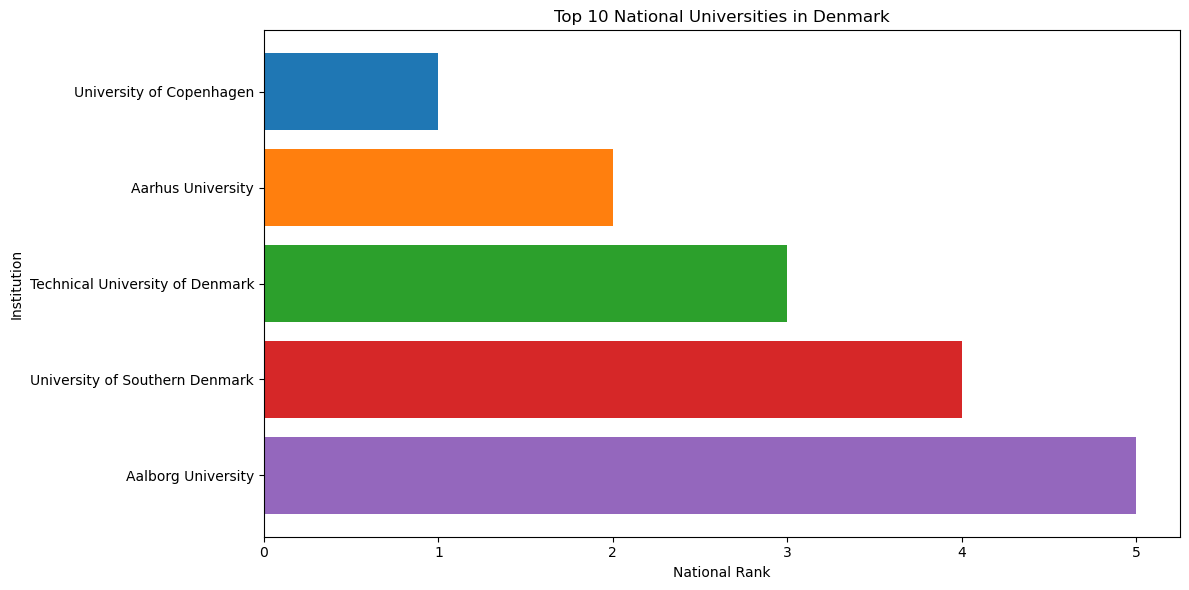

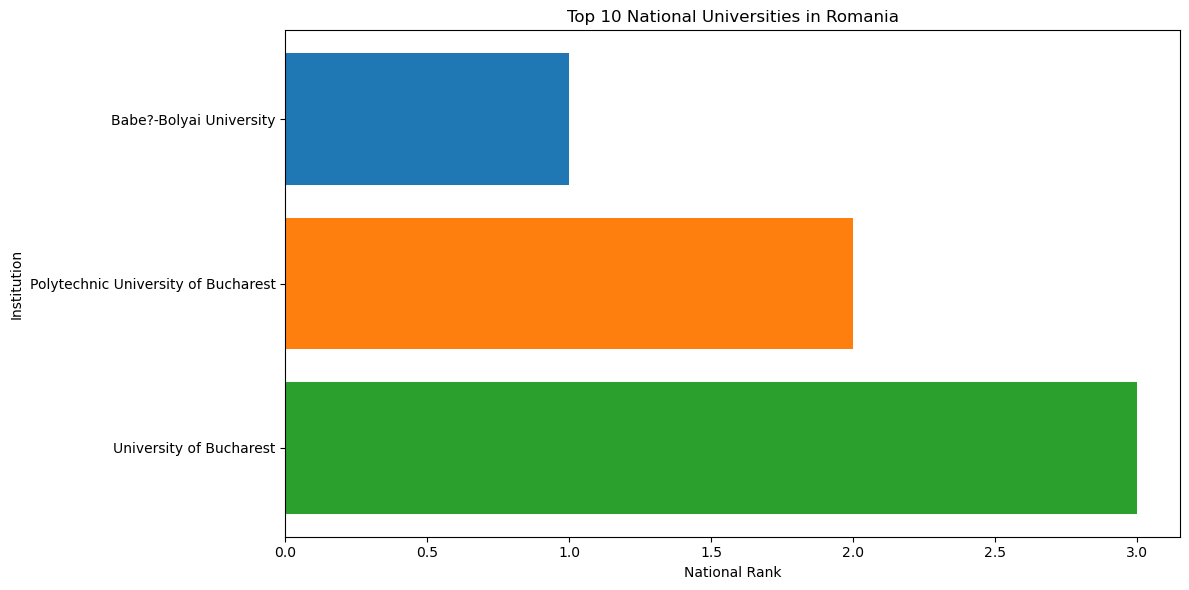

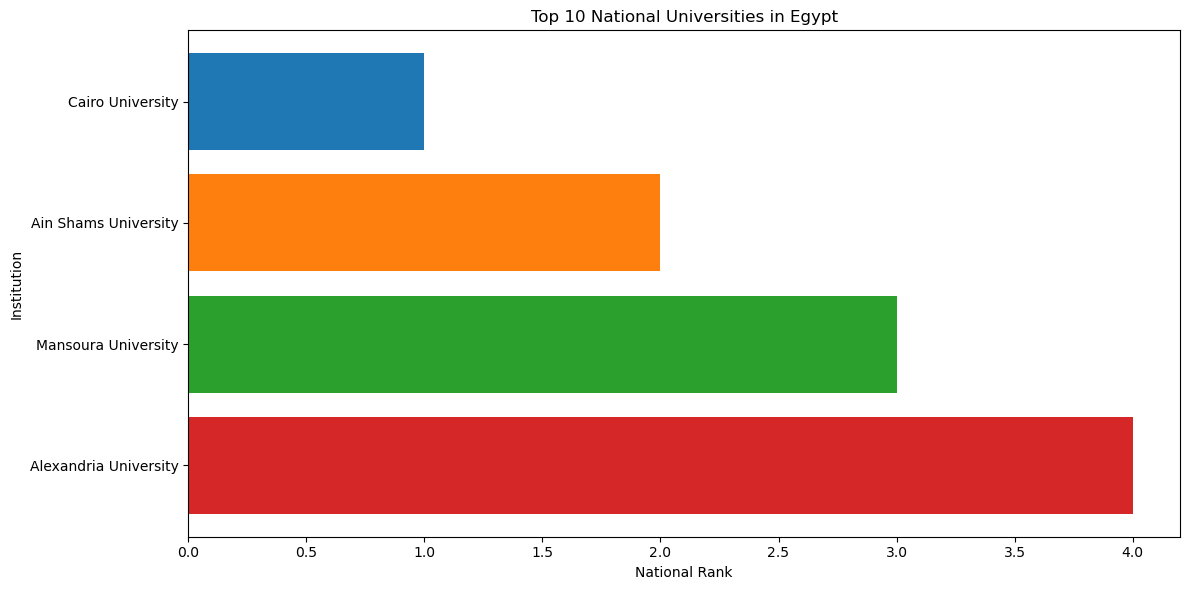

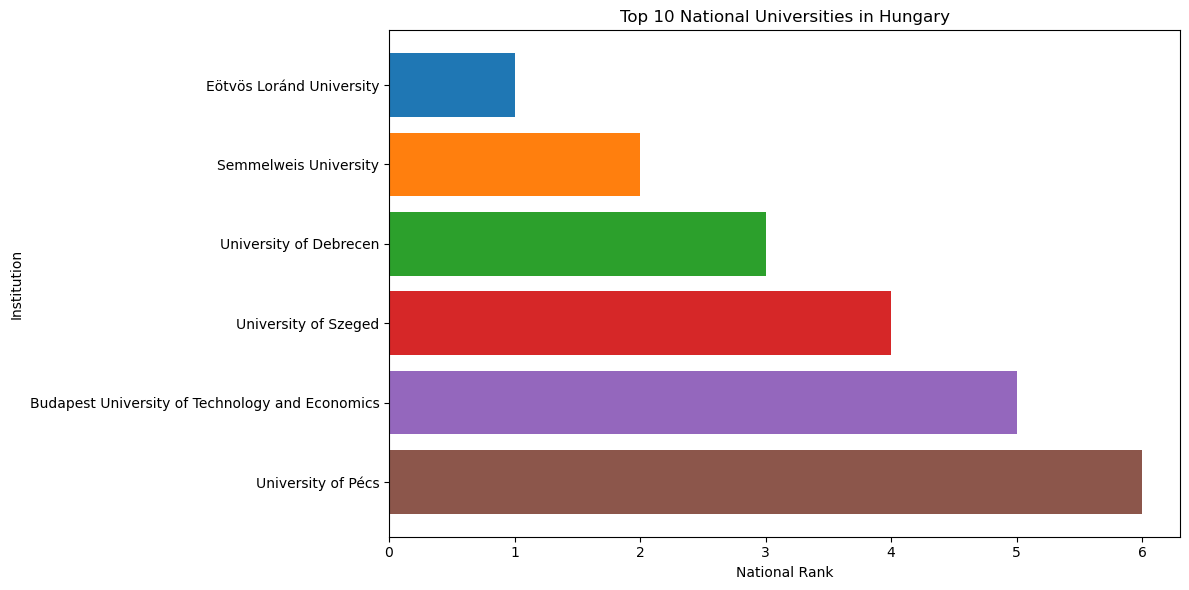

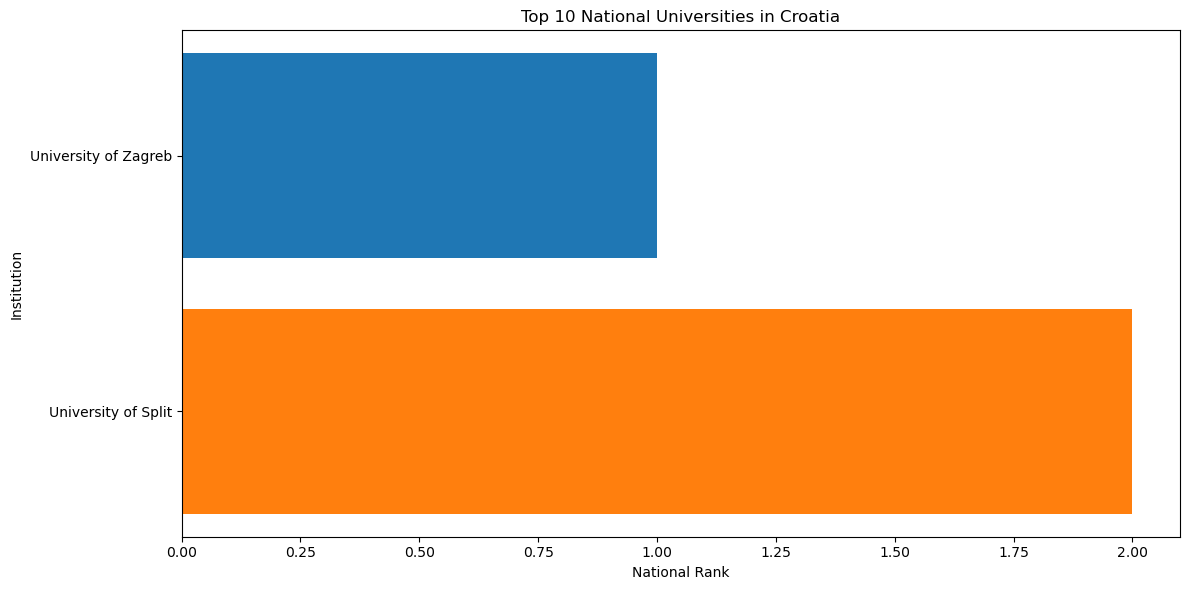

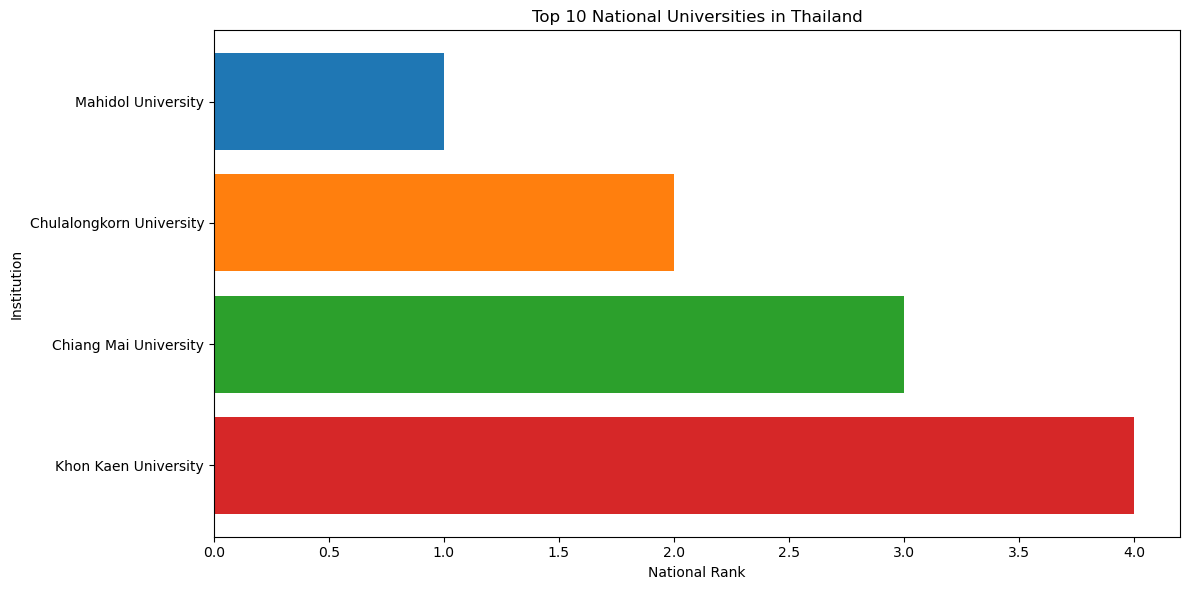

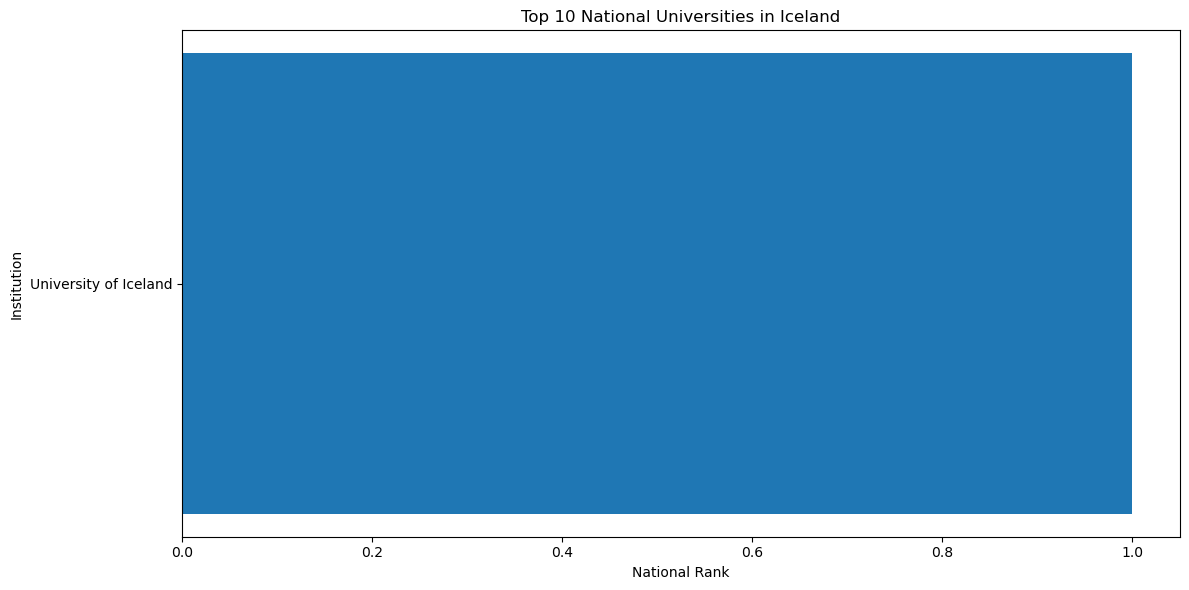

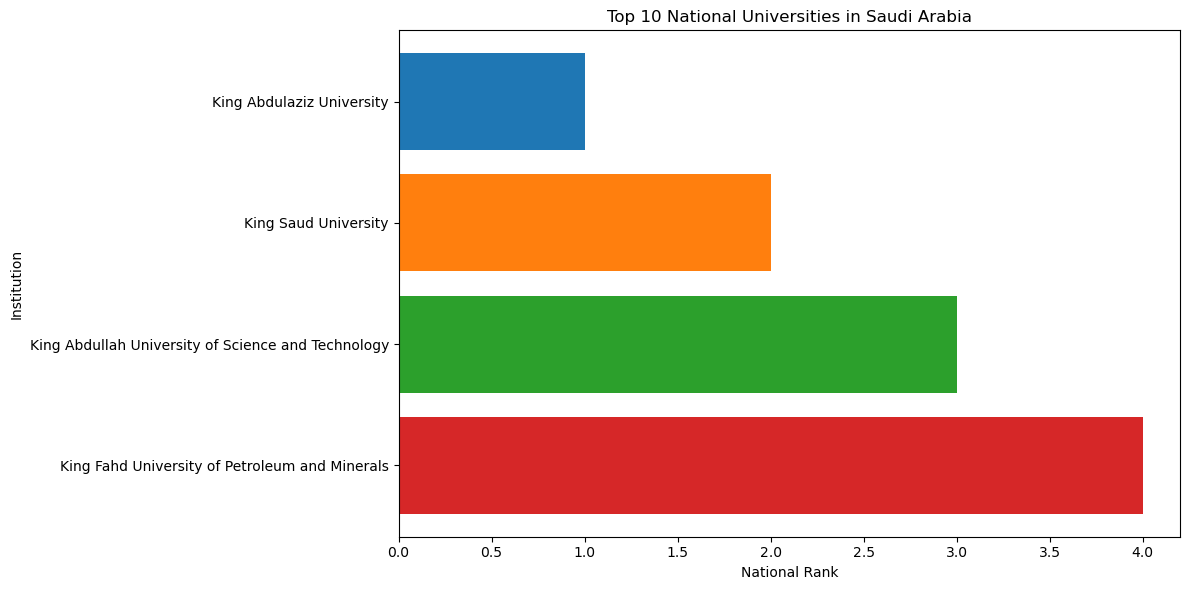

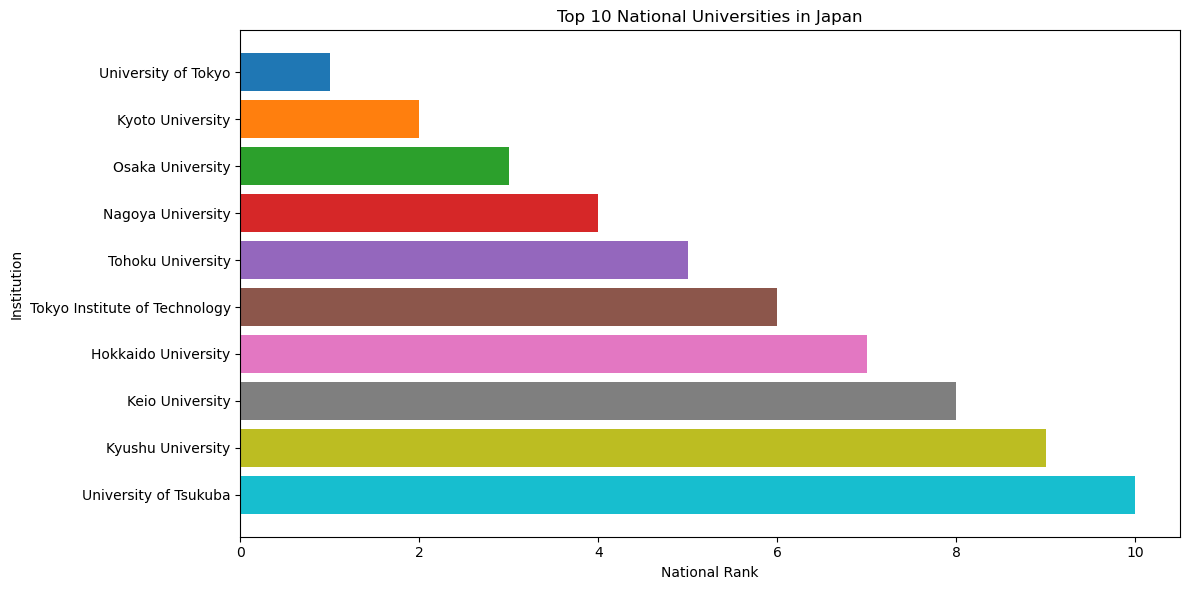

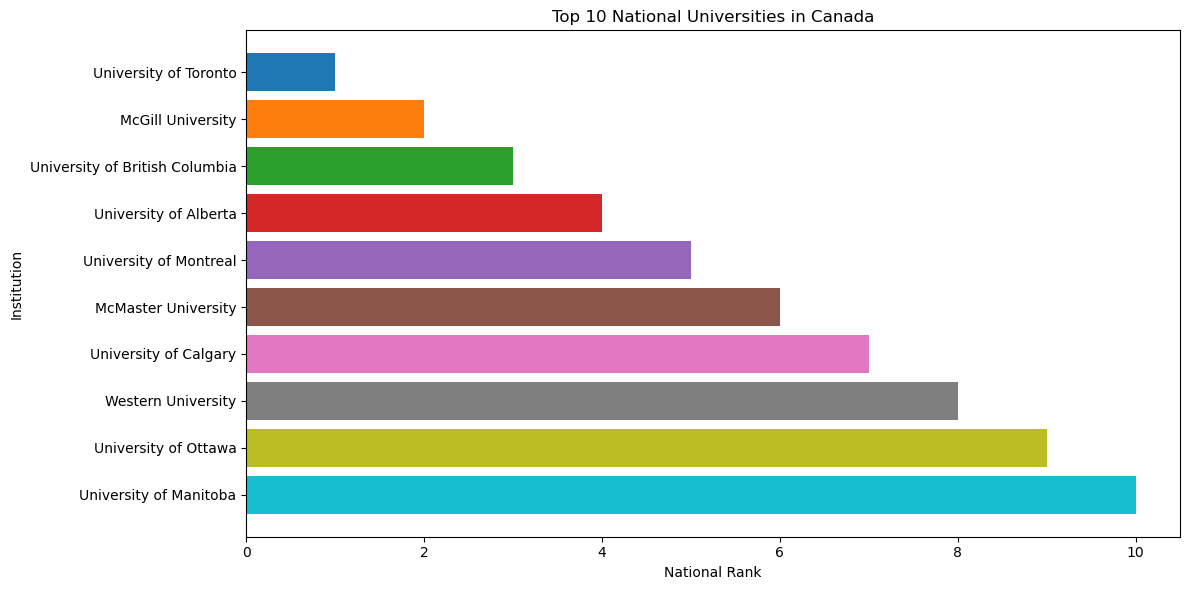

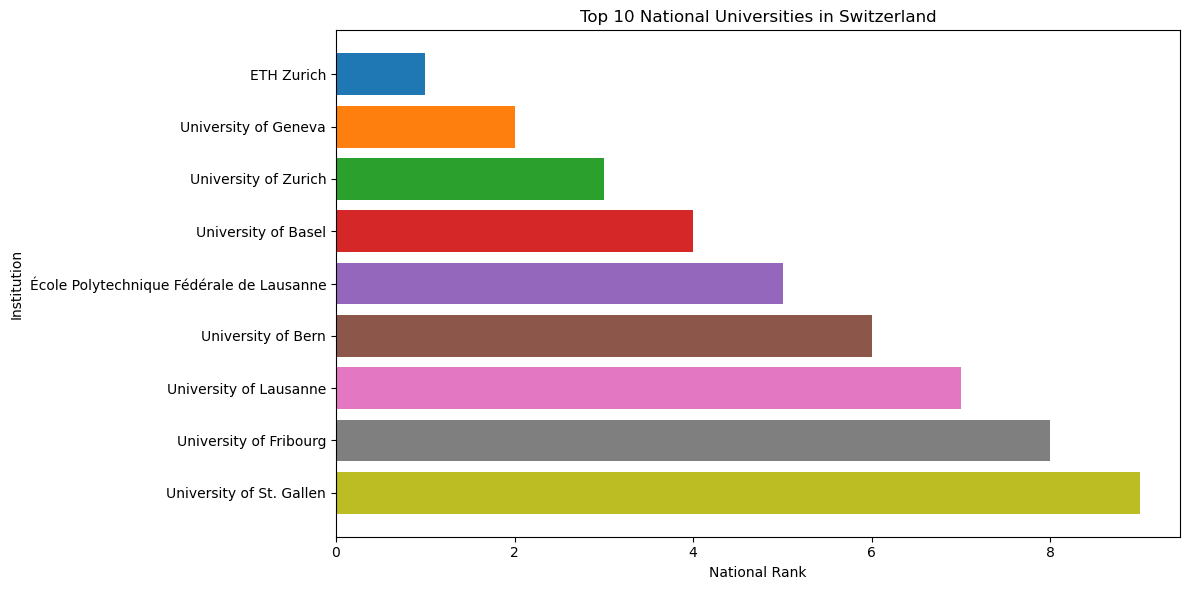

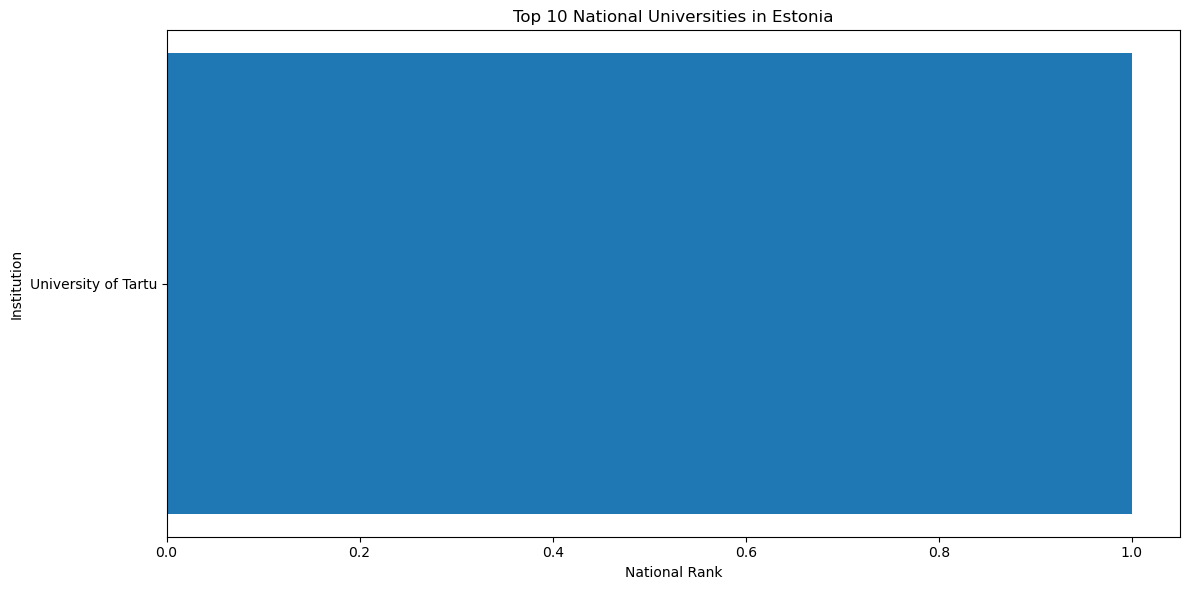

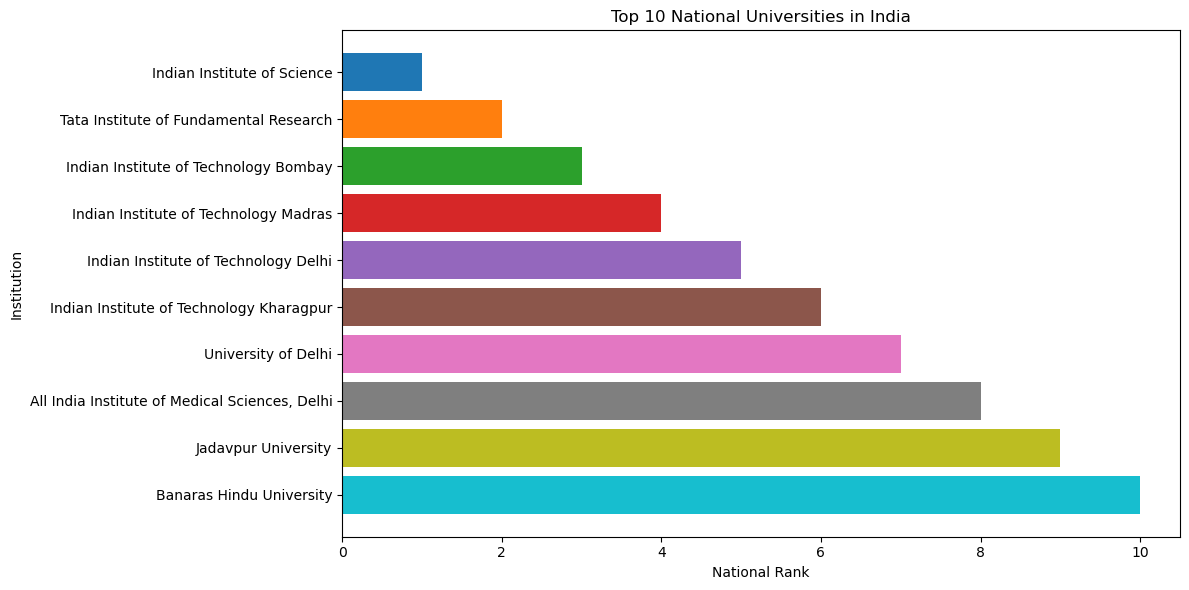

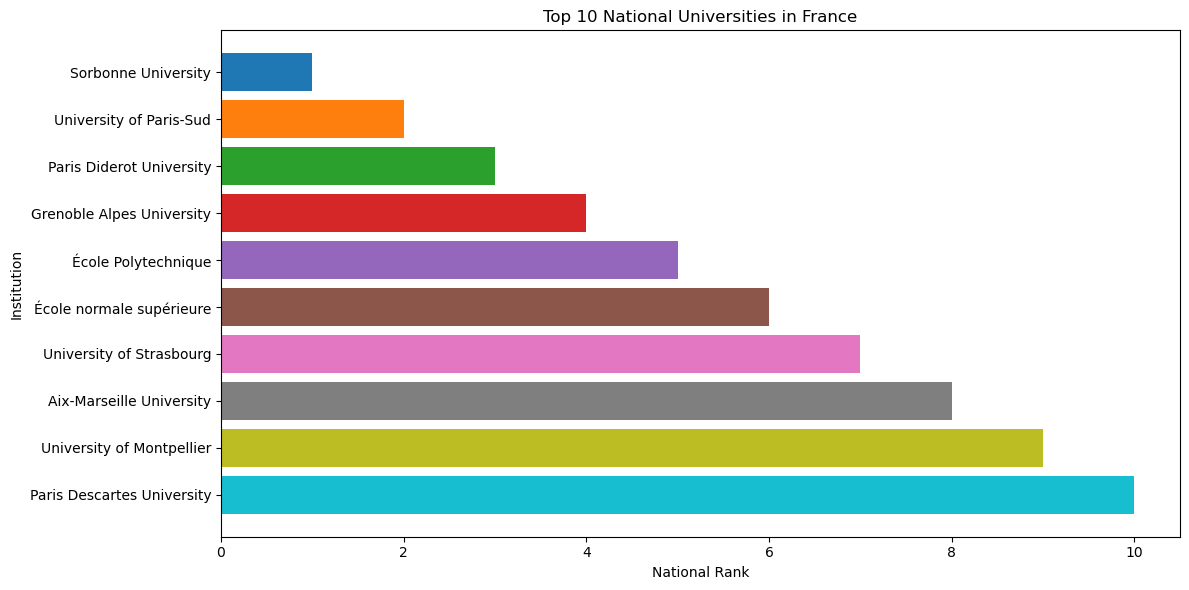

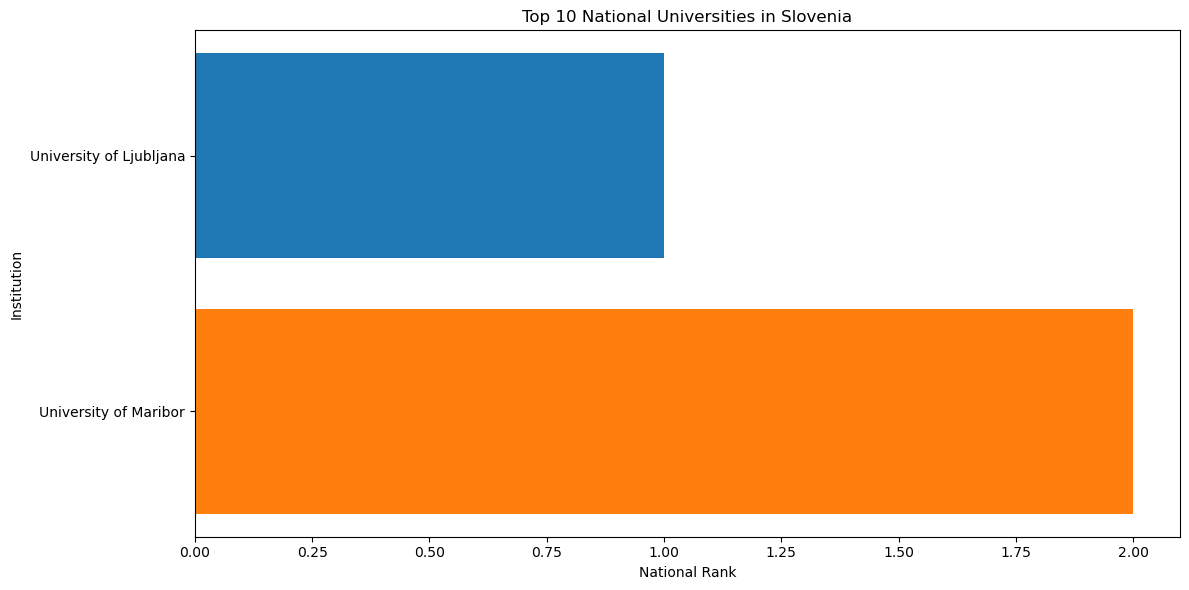

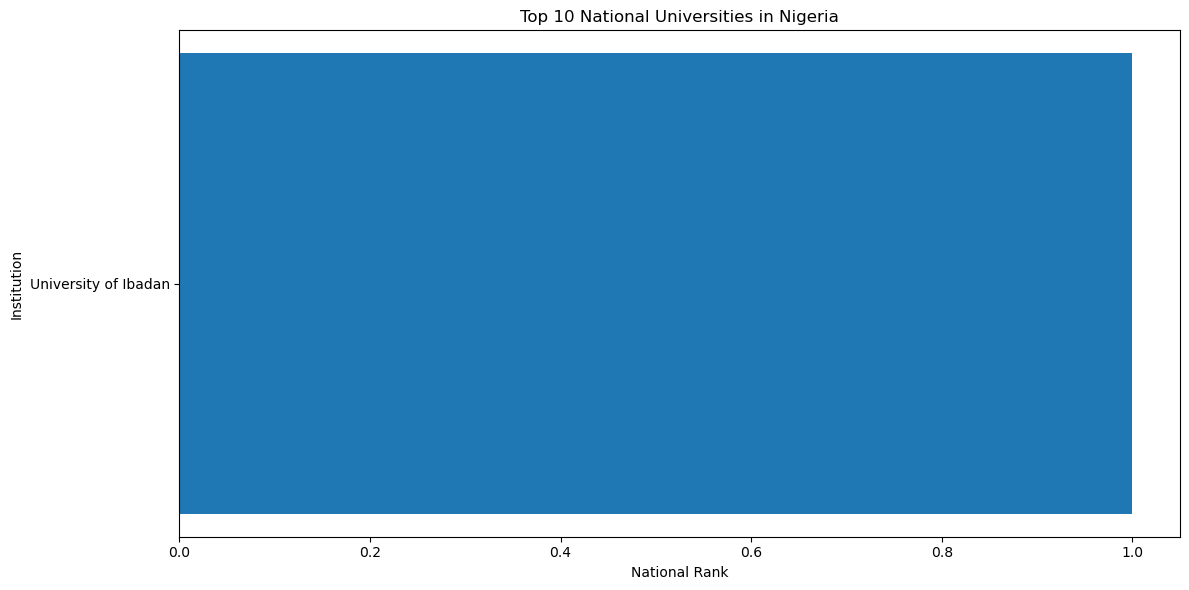

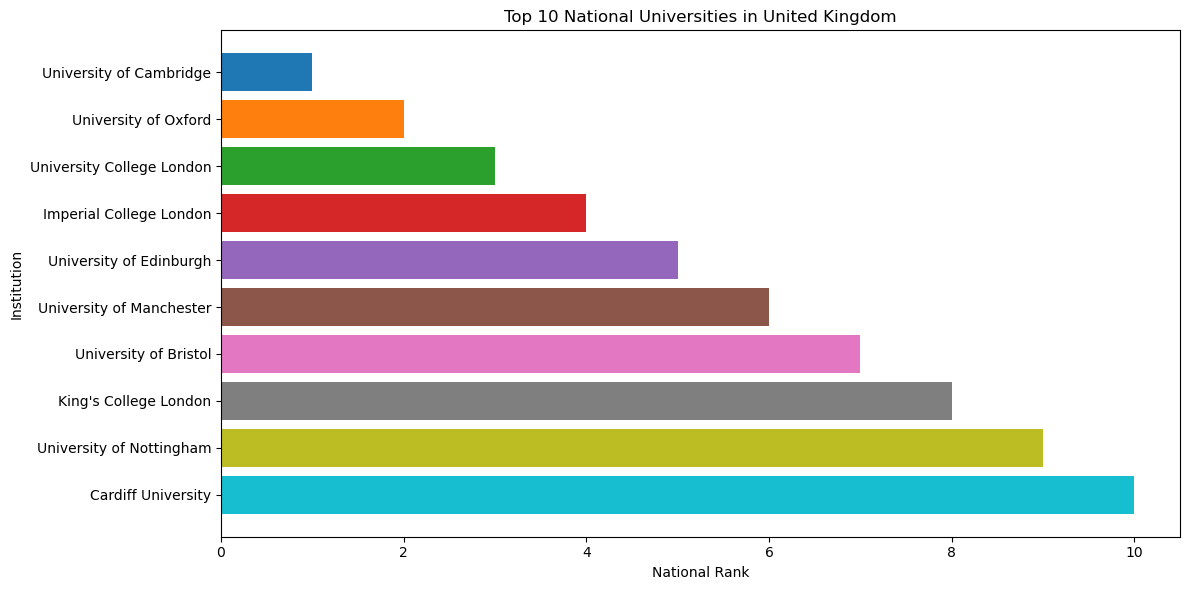

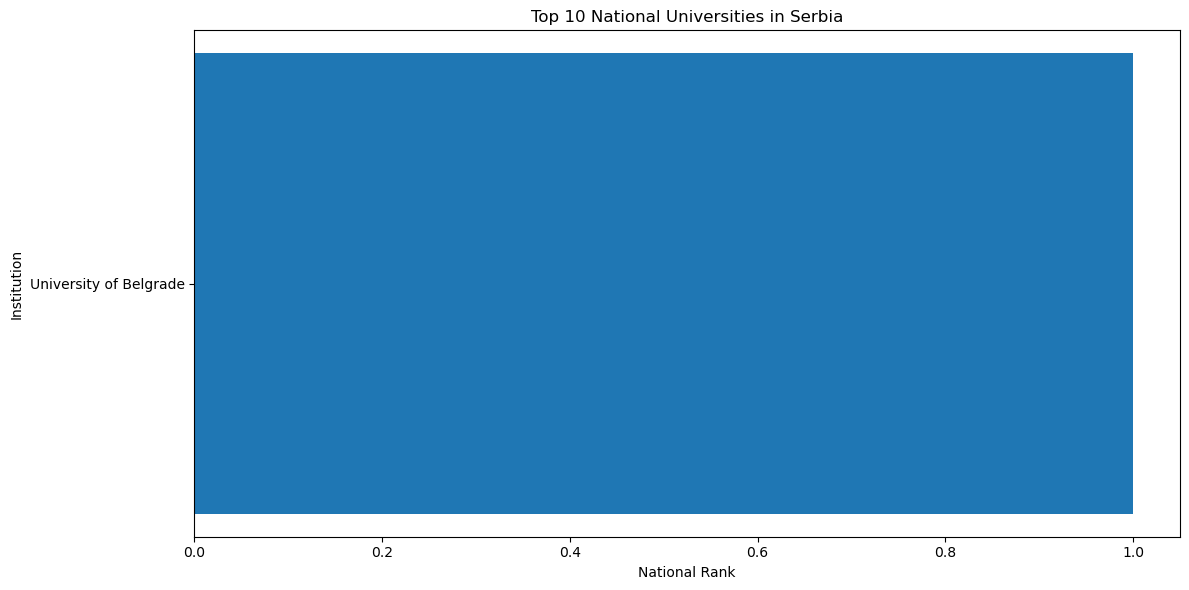

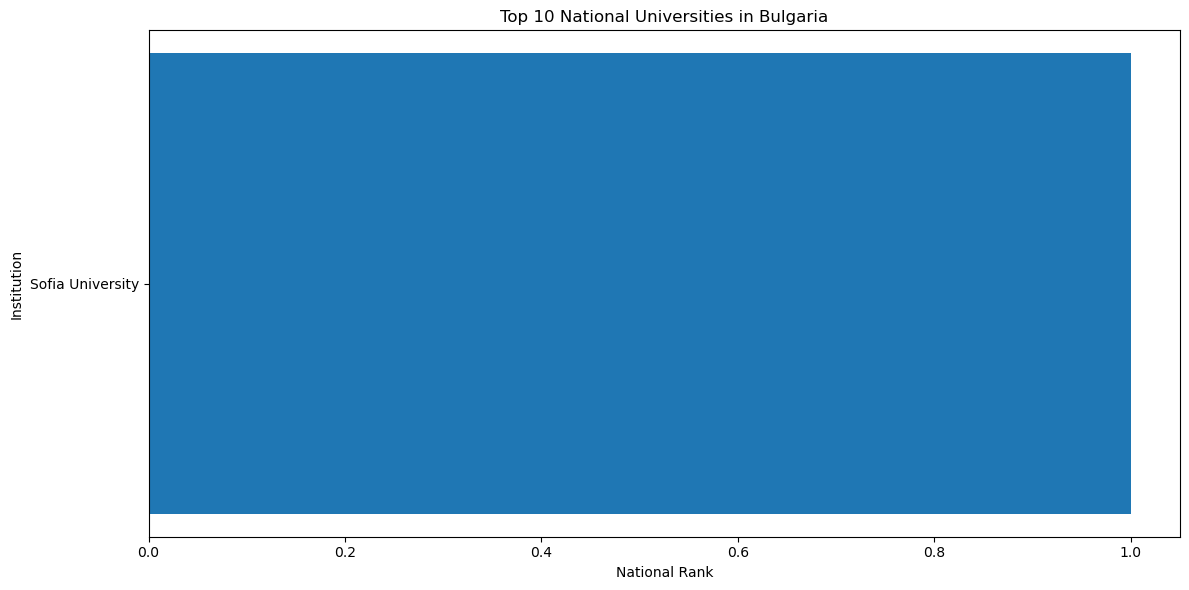

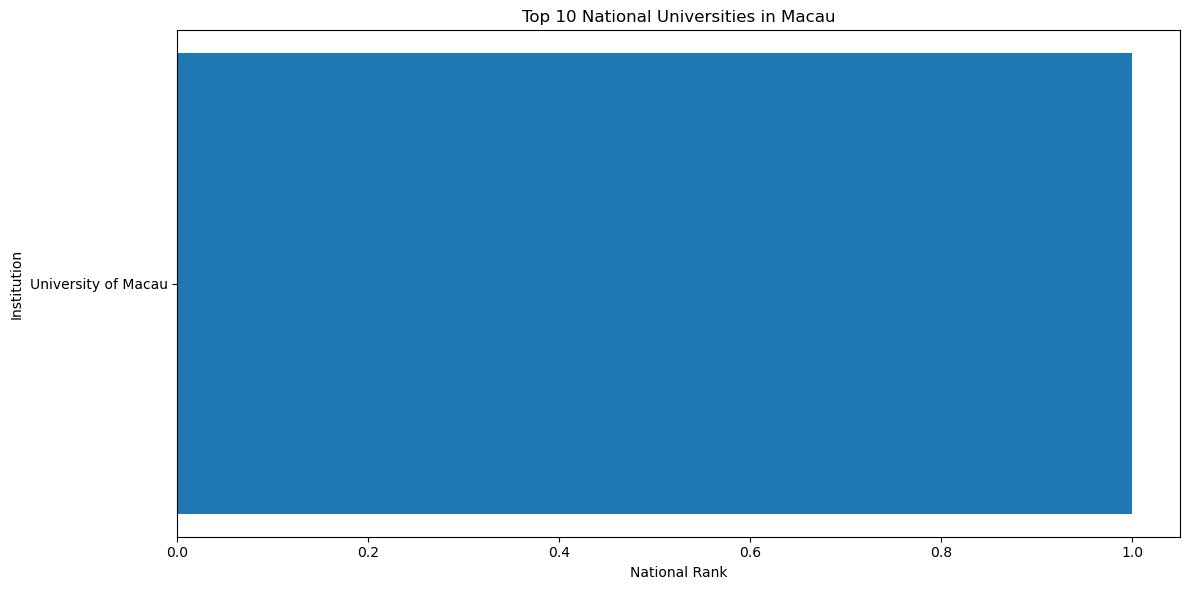

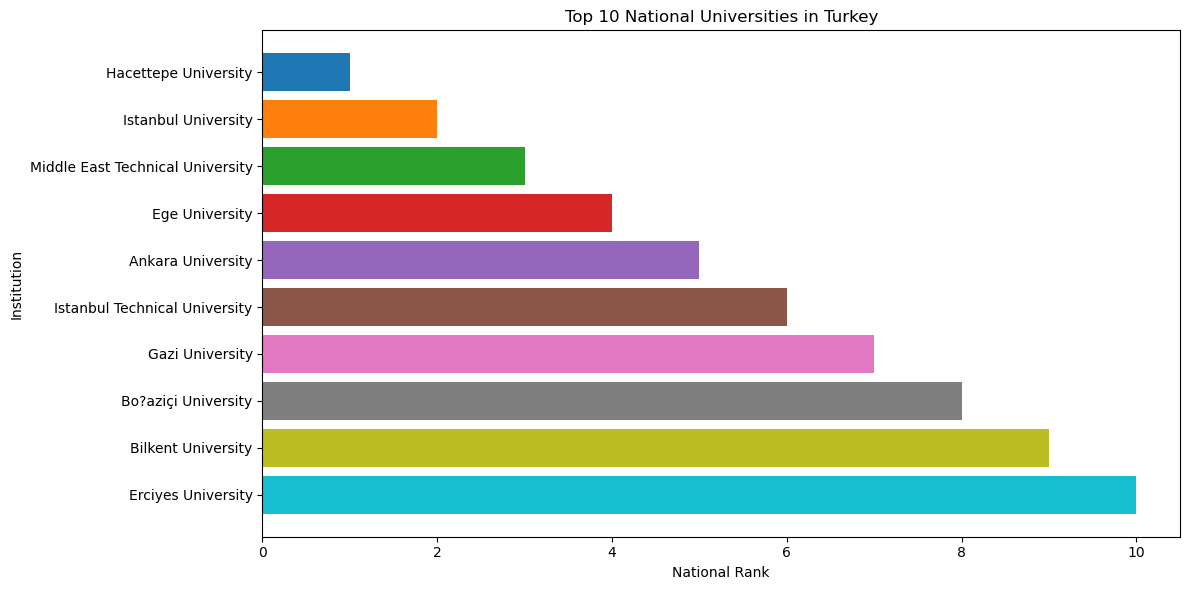

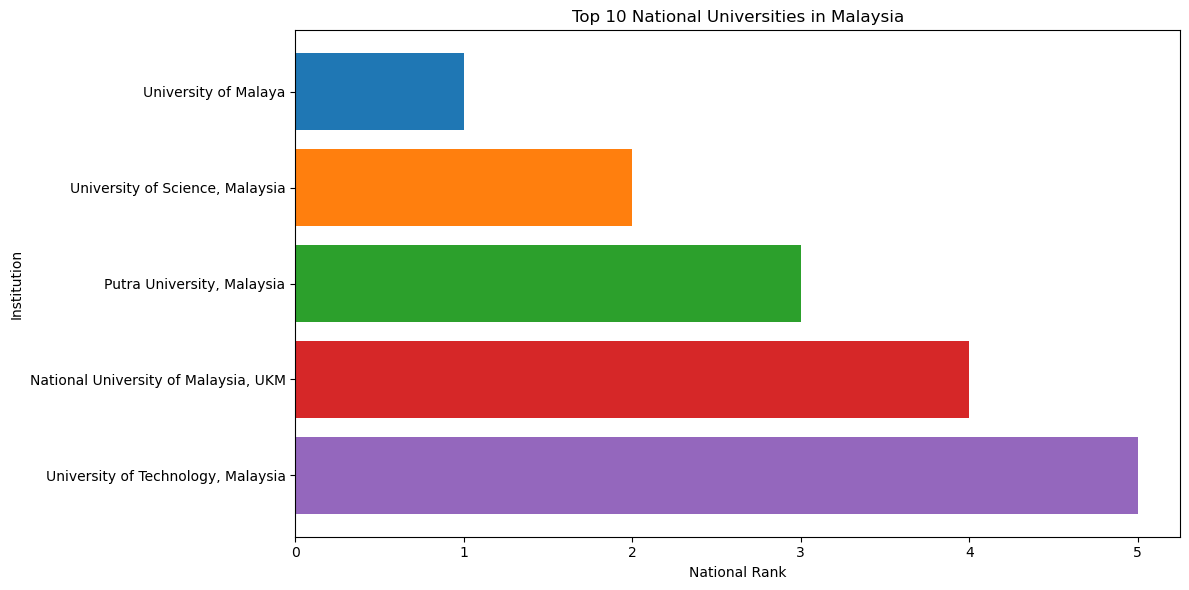

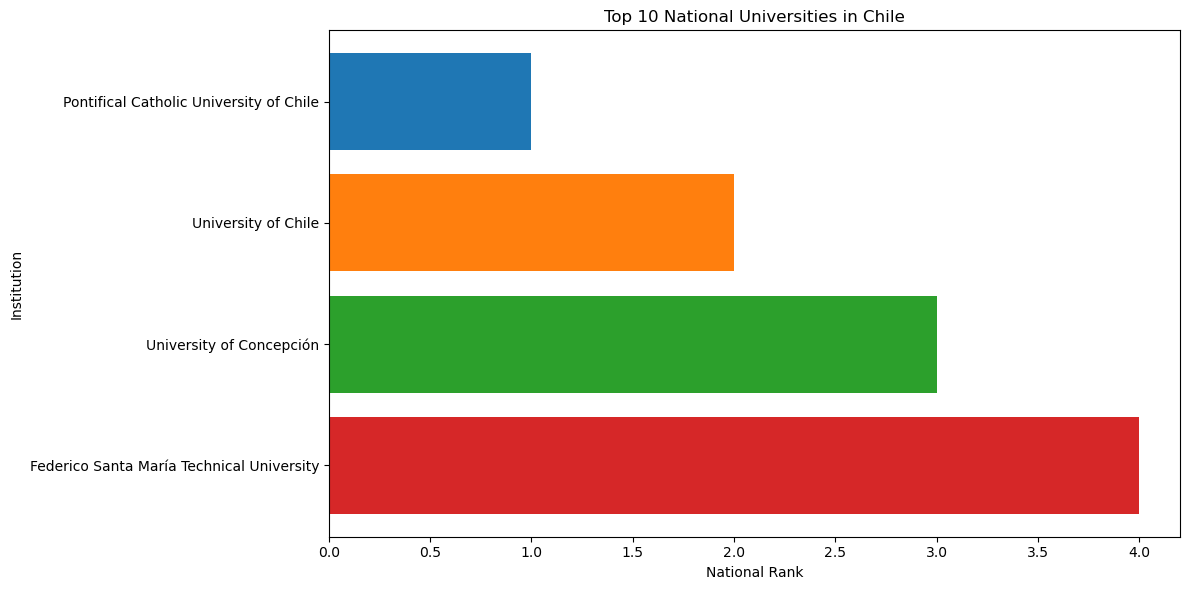

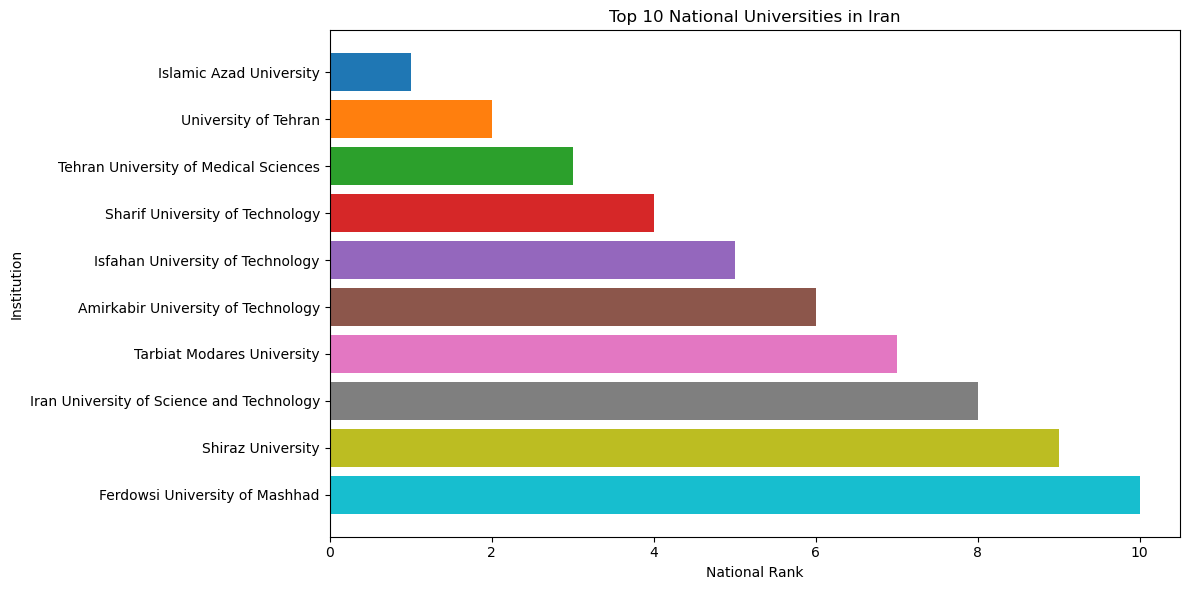

In [120]:
# Identify the top 10 universities per country based on national rank
top_10_per_country = data_cleaned.sort_values("National_Rank").groupby("Location").head(10)

# Plot for each country
countries = top_10_per_country["Location"].unique()
for country in countries:
    country_data = top_10_per_country[top_10_per_country["Location"] == country]
    plt.figure(figsize=(12, 6))
    plt.barh(country_data["Institution"], country_data["National_Rank"], color=colors_global[:len(country_data)])
    plt.gca().invert_yaxis()  # Invert the y-axis for ranking order
    plt.title(f"Top 10 National Universities in {country}")
    plt.xlabel("National Rank")
    plt.ylabel("Institution")
    plt.tight_layout()
    plt.show()


The question about factors that are most strongly associated with a university’s ranking in the top 100 globally, is addressed by the correlation matrix which shows the relationships between features and the target variable (Top_University).

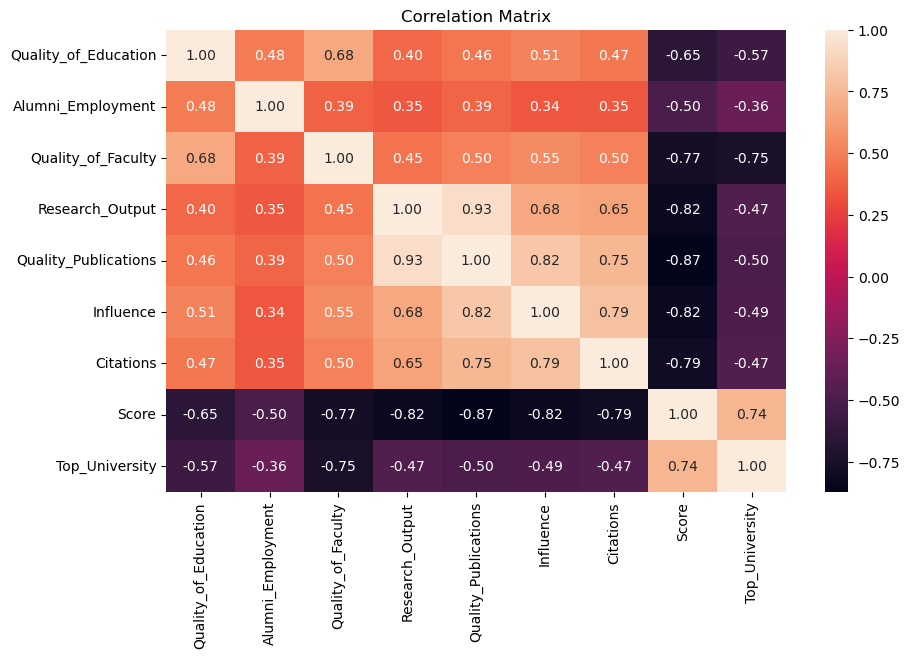

In [33]:
plt.figure(figsize=(10, 6))
sns.heatmap(data_cleaned[features + ['Top_University']].corr(), annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

**Observation**
The correlation matrix provides insights into the relationships between different variables in the dataset. The diagonal values represent the self-correlation of each feature, which is always 1. For other relationships, a positive correlation indicates that as one variable increases, the other tends to increase as well, while a negative correlation suggests an inverse relationship.

From the matrix, it is evident thaQuality_of_Education,  `Quality_of_Faculy` `Research_Outpt`, an `Quality_Publicatios` show strong positive correlations with each other, suggesting that higher research output and quality publications are often associated with better facultand education y quality.

he `Top_Univerity` target variable is negatively correlated with features lke `World_ank` (not shown directly in this matrix but implied by ranking structure) and positively correlated wth `SorHowevera the other ly, featons` have a significnegativetive correlation wth `Top_Univerity`, indicating that these fac do nottors play a critical role in distinguishing top universities from others.

Interestigly, `Alumni_Emplyment` shows relatively weaker correlations with other features and the target variable compared to academic metrics like publications and research output. This could suggest that employment outcomes, while important, might not be as influential in defining a university's "top" status based on this dataIn conclusion
Overall, the matrix highlights the relationships and influences of academic and quality metrics, guiding feature seetation for predictive modelin needed!

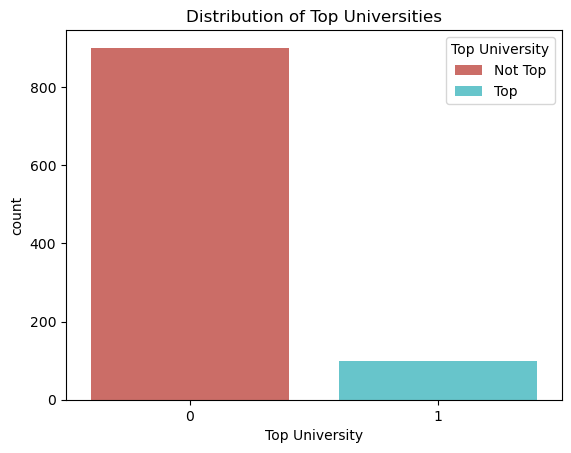

In [55]:
# Distribution of top vs non-top universities
sns.countplot(x='Top_University', data=data_cleaned, hue='Top_University', palette="hls")
plt.title("Distribution of Top Universities")
plt.xlabel("Top University")
plt.legend(title="Top University", labels=["Not Top", "Top"])
plt.show()

X-Axis: Represents the categories—0 for non-top universities and 1 for top universities.
Y-Axis: Represents the count of universities in each category, ranging from 0 to 900.
Based on the treshold I established earlier, there are 900 universities categorized as 0 (non-top universities), and 100 universities categorized as 1 (top universities).

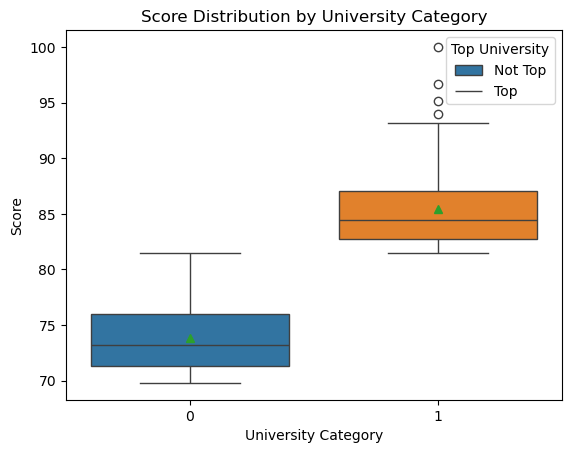

In [61]:
# Boxplot for Score vs Top_University
sns.boxplot(x='Top_University', y='Score', data=data_cleaned, hue='Top_University', palette="tab10", showmeans=True)
plt.title("Score Distribution by University Category")
plt.xlabel("University Category")
plt.ylabel("Score")
plt.legend(title="Top University", labels=["Not Top", "Top"])
plt.show()

**Explanation**
The boxplot provides a visual comparison of the Score distributions between two categories of universities: "Not Top" (0) and "Top" (1). The median score for top universities is significantly higher than that of non-top universities, as shown by the higher position of the central line in the top university box. The range of scores for top universities is narrower compared to non-top universities, indicating less variation in scores among top institutions. The outliers above the whiskers suggest that some top universities have exceptionally high scores, but these are not representative of the majority. For non-top universities, the median score is lower (~73) than that for top universities (~85), and there is greater variability in the scores, as indicated by the longer whiskers and wider box. A few outliers with high scores exist for non-top universities, which suggests that some non-top universities achieve scores close to the range of top universities. Overall, the plot indicates a clear distinction between the two categories, with top universities generally achieving higher scores. This supports the hypothesis that the Score variable is a strong predictor for classifying universities as top or not.

## Logistic Regression Model

In [63]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [65]:
# Predictions
y_pred = logistic_model.predict(X_test)
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]

In [67]:
# Metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Logistic Regression Accuracy:", accuracy)
print("Logistic Regression ROC AUC:", roc_auc)

Logistic Regression Accuracy: 0.99
Logistic Regression ROC AUC: 0.9983827493261456


**Explanation**

Logistic Regression Accuracy: The accuracy of 0.99 (99%) indicates that the model correctly predicted the classification of universities for 99% of the test dataset. This is a very high accuracy, suggesting that the model fits the data well.

Logistic Regression ROC AUC: The ROC AUC score of 0.998 indicates an almost perfect ability of the model to distinguish between "Top" and "Not Top" universities. A score close to 1 signifies excellent performance, as the model is effectively ranking the positive class higher than the negative class in terms of predicted probabilities.

The logistic regression model demonstrates excellent performance with both high accuracy and near-perfect ROC AUC. This suggests that the features selected for the model (Quality of Education, Research Output, etc.) strongly correlate with the classification target (Top_University). However, further evaluation, such as cross-validation or checking for overfitting, might be necessary to ensure the model's generalizability to other datasets.

Overfitting can be validated by examining how the model performs on training data versus unseen test data. A model is likely overfitting if it achieves very high performance on the training set but performs poorly on the test set.

### Compare Training and Test Set Performance

In [69]:
# Training set metrics
y_train_pred = logistic_model.predict(X_train)
y_train_pred_proba = logistic_model.predict_proba(X_train)[:, 1]
train_accuracy = accuracy_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)

# Test set metrics (already calculated)
test_accuracy = accuracy
test_roc_auc = roc_auc

print("Training Accuracy:", train_accuracy)
print("Training ROC AUC:", train_roc_auc)
print("Test Accuracy:", test_accuracy)
print("Test ROC AUC:", test_roc_auc)


Training Accuracy: 0.9957142857142857
Training ROC AUC: 0.9998304058146579
Test Accuracy: 0.99
Test ROC AUC: 0.9983827493261456


**Explanation**

The small difference between the training and test accuracies (99.57% vs. 99%) and ROC AUC scores (99.98% vs. 99.8%) suggests that the model is not overfitting. It generalizes well to unseen data.
Both the accuracy and ROC AUC scores are very high, reflecting that the logistic regression model is highly effective in classifying universities as "Top" or "Not Top" based on the selected features.

###  Cross-Validation

Performing k-fold cross-validation to assess the model's performance across different subsets of the data also helps in detecting overfitting.
Cross-validation involves splitting the dataset into multiple folds and training/testing the model on different subsets of the data to assess its robustness.

In [80]:
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
# Perform 5-fold cross-validation
cv_accuracy = cross_val_score(logistic_model, X, y, cv=5, scoring='accuracy')
cv_roc_auc = cross_val_score(logistic_model, X, y, cv=5, scoring='roc_auc')

print("Cross-Validation Accuracy (mean):", cv_accuracy.mean())
print("Cross-Validation ROC AUC (mean):", cv_roc_auc.mean())


Cross-Validation Accuracy (mean): 0.913
Cross-Validation ROC AUC (mean): 1.0


**Explanation**
The high cross-validation accuracy (91.3%) and perfect ROC AUC (1.0) suggest that the logistic regression model is robust and capable of making reliable predictions.
The slight drop in accuracy compared to the test set is expected due to the variations in data subsets during cross-validation. It reflects the model's performance on a broader set of data splits.
The perfect ROC AUC across folds suggests a strong separation capability, making this model highly effective for classification.

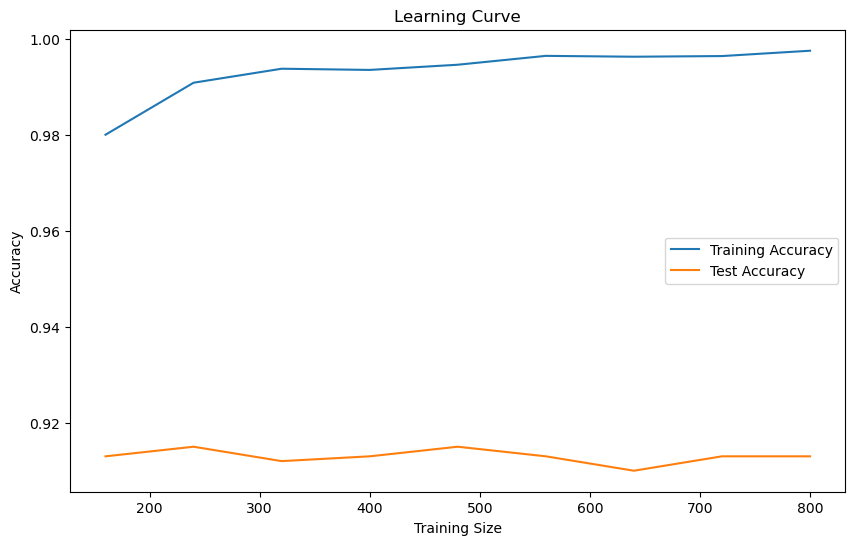

In [84]:
train_sizes, train_scores, test_scores = learning_curve(logistic_model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy')
plt.plot(train_sizes, test_mean, label='Test Accuracy')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Explanation**
The learning curve illustrates the performance of the logistic regression model as the training size increases. The training accuracy (blue line) starts near 1.0 and remains consistently high, indicating the model fits the training data very well. The test accuracy (orange line) stabilizes around 0.91, showing a gap between training and test accuracy. This gap suggests the model is slightly overfitting the training data. However, the stable test accuracy implies the model generalizes reasonably well to unseen data. Overall, the curve demonstrates that increasing the training size does not significantly improve test accuracy, indicating a well-trained model with minimal need for additional data.

## Decision Tree

In [86]:
## Decision Tree Classifier
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [88]:
# Predictions
y_tree_pred = tree_model.predict(X_test)
y_tree_pred_proba = tree_model.predict_proba(X_test)[:, 1]

In [90]:
# Metrics
tree_accuracy = accuracy_score(y_test, y_tree_pred)
print("Decision Tree Accuracy:", tree_accuracy)

Decision Tree Accuracy: 1.0


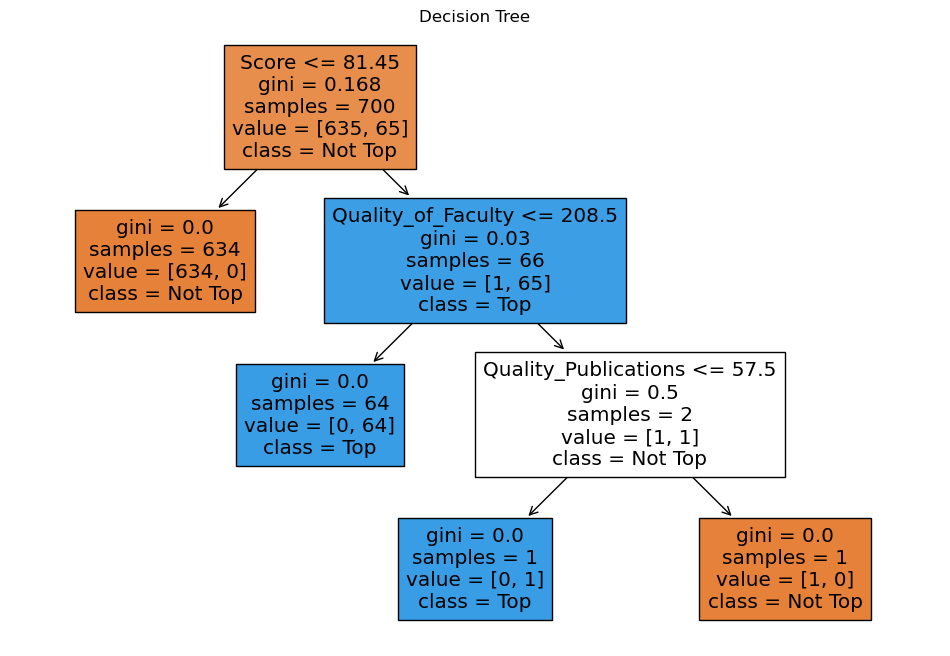

In [92]:
# Plotting the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree_model, feature_names=features, class_names=['Not Top', 'Top'], filled=True)
plt.title("Decision Tree")
plt.show()

**Explanation**
The decision tree visualization represents the process used by the model to classify universities into "Top" or "Not Top" categories. The tree begins with the root node, where the primary splitting criterion is based on the Score feature. If a university’s score is less than or equal to 81.45, the model confidently classifies it as "Not Top," with all 634 instances in this branch being pure (Gini = 0). This demonstrates that universities with low scores are easily separable from top universities.

For universities with scores greater than 81.45, the tree further splits based on th `Quality_of_Facul ` feature. If this value is less than or equal to 208.5, the classification becomes "Top" for most universities. The remaining splits refine the classification further, using features such a `Quality_Publicatios`, though these splits involve much smaller sample sizes and introduce some uncertainty (evidenced by higher Gini indices in certain nodes).

The decision tree achieved an accuracyf *.0** on the test set, indicating perfect classification. This perfect accuracy suggests that the features chosen are highly predictive of the target variable in the test datawer.